In [1]:
import os

# longitudonal_sequences_folder  = r'/Users/shefali/Dropbox/Research/HIVEpistatic/all_longitudinal_data'
# filenames = [] 
# for filename in os.listdir(longitudonal_sequences_folder ):
#     if filename.endswith(".fasta"):
#         file = os.path.join(longitudonal_sequences_folder, filename)
#         filenames.append(file)
#     else:
#         continue
        
# len(filenames) # to check number of files:  ls -1 [directory] | wc -l

filenames = [r'/Users/shefali/Dropbox/Research/HIVEpistatic/hivdb_subtypeB_rt_reference_aligned.fasta']

In [6]:
def getSequences(filename):
    sequences = []
    patient_info = []
    file = open(filename).read()
    lines = file.split("\n")
    patient_num = -1
    for line in lines:
        if ">" in line:
            patient_info.append(line)
            patient_num += 1
        elif line:  # check not empty
            line = line.replace("-", "N")
            line = line.replace("~", "N")
            if len(sequences) == patient_num:
                sequences.append(line)
            else:
                sequences[patient_num] += line
                
    return [patient_info, sequences]

# # usage
info, seqs = getSequences(filenames[0])
# if first sequence is reference
info, seqs = info[1:], seqs[1:]

print(len(info), len(seqs))

lengths = set([len(seq) for seq in seqs])
print(lengths)
    
# # Confirm correct parsing
for i in range(3):
    print(info[i])
    print(seqs[i])

72200 72200
{1690}
>1007_15020_ARCH014_1998_B__None
CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAATGGATGGCCCAAAAGTTAAACAATGGCCATTGACAGAAGAAAAAATAAAAGCATTAACAGAAATATGTACAGAAATGGAAAAAGAAGGAAAAATTTCAAAAATTGGGCCTGAAAACCCATACAATACTCCAGTATTTGCCATAAAGAAAAAAGACAGTACCAAATGGAGGAAATTAGTAGATTTCAGAGAACTTAATAAAAGAACTCAAGATTTTTGGGAGGTTCAATTAGGAATACCGCACCCGGCAGGGTTAAAAAAGAAAAAATCAGTAACAGTACTGGATGTGGGGGATGCATATTTTTCAGTCCCCTTAGATAAGGATTTCAGGAAGTACACTGCATTTACCATACCTAGTGTCAACAATGAGACACCAGGAATTAGGTACCAGTACAATGTGCTTCCACAGGGATGGAAAGGATCACCAGCAATATTCCAAAGCAGCATGATAAAGATCTTAGAGCCTTTTAGAAAACAAAATCCGGACATAGTTATCTATCAATACATGGATGATTTGTATGTAGGATCTGACTTAGAAATAGGGCAGCATAGAACAAAAATAGAGGAACTGAGACAACATCTGTTAAGGTGGGGATTTACCACACCAGACAAAAAACATCAGAAAGAACCTCCATTTCTTTGGATGGGTTATGAACTCCATCCTGATAAATGGACAGTACAGCCTATAATGCTGCCAGAAAAAGATAGCTNGGACTGTCAATGACATACANNGAAATTAGTGGGAAAATTAAATTGGGCAAGTCAGATTTATCCAGGGATTNAAAGTAAGGCAGTTATGTAAACTCCTTAGGGGAACCAAAGCACTAACGGAAGTAGTACCACTAACANNGAAGAAGCANNGAGNNCTAGAACTGGCAGAAAACAGGGAGATTCTAAAAGAACC

In [7]:
# ! pip install biopython

In [14]:
from Bio.Seq import Seq

def amino_translate(sequence, filename):
    coding_dna = Seq(sequence)
    protien_sequence = coding_dna.translate(stop_symbol="@") #set to_stop=True to translate until reaching stop codon
    # if "@" in protien_sequence:
        # print("FOUND STOP CODON IN FILE: ", filename, "SEQUENCE: ", str(protien_sequence), "\n\n")
    return protien_sequence

In [16]:
# write back to new file with protien sequence 
import sys
import Bio.Data.CodonTable as table

def nucleotide_to_amino_file(filename, outputDir):
    
    info, seqs = getSequences(filename)
    # if first sequence is reference
    info, seqs = info[1:], seqs[1:]

    if len(info) != len(seqs):
        print("parsing error")
        print(info, seqs)
    
    path_to_file = os.path.splitext(filename)[0]
    simple_filename = path_to_file.split("/")[-1]
    
    out = open(outputDir + "/" + simple_filename + "_amino.fasta", "w")

    current = 0
    num_errors = 0
    num_stop_codons = 0
    
    for i in range(len(info)):
        try:
            current = i
            amino_seq = str(amino_translate(seqs[i], filename))
            if "@" in amino_seq:
                num_stop_codons += 1
                continue
            out.write(info[i])
            out.write("\n")
            out.write(amino_seq) 
            out.write("\n")
        except table.TranslationError as err:
            # typically unknown characters
            num_errors += 1
            # print("Excluding sequence, error on: ", err, filename, seqs[current], "\n\n\n")
    out.close()
    print("Number of files with stop codons:", num_stop_codons, "Number of errors", num_errors)

for filename in filenames:
    nucleotide_to_amino_file(filename, '/Users/shefali/Dropbox/Research/HIVEpistatic/protien_sequences')

Number of files with stop codons: 34177 Number of errors 510


# Sequence Alignment

In [17]:
! pwd

/Users/shefali/Dropbox/Research


In [18]:
! cat HIVEpistatic/protien_sequences/* > HIVEpistatic/all_protien_sequences.fasta


In [20]:
! mafft HIVEpistatic/all_protien_sequences.fasta > HIVEpistatic/aligned_protien_sequences.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 12848939 ambiguous characters.
 41501 / 41530
done.

Constructing a UPGMA tree (efffree=0) ... 
 41520 / 41530
done.

Progressive alignment 1/2... 
STEP  15901 / 41529 
Reallocating..done. *alloclen = 2129
STEP  41501 / 41529  h
done.

Making a distance matrix from msa.. 
 41500 / 41530
done.

Constructing a UPGMA tree (efffree=1) ... 
 41520 / 41530
done.

Progressive alignment 2/2... 
STEP  41501 / 41529  h
done.

disttbfast (aa) Version 7.453
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct)

# Post-alignment

In [1]:
# Rewritten to deal w/ \n characters in sequences introduced by linsi
def getAlignedSequences(filename):
    sequences = []
    patient_info = []
    file = open(filename).read()
    lines = file.split("\n")
    currSeq = ""
    for line in lines:
        if ">" in line:
            patient_info.append(line)
            if currSeq != "":
                sequences.append(currSeq)
            currSeq = ""
        elif line:  # check not empty
            line = line.replace("~", "N")
            currSeq = currSeq + line
    return [patient_info, sequences]

In [2]:
info, seqs = getAlignedSequences('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.fasta')

In [3]:
patients = []
for inf in info:
    split = inf.split("_")
    patient = split[0] + split[1]
    if patient not in patients:
        patients.append(patient)
        
print("Total patients: ", len(patients)) # should be n - (# patients whos HIV included stop codons, errors, or dashes in positions 1-230)
print("Total sequences: ", len(seqs))

Total patients:  35873
Total sequences:  41529


In [4]:
import pandas as pd
aligned_seqs = pd.DataFrame(list(zip(info, seqs)), columns =['Patient info', 'Sequence'])
aligned_seqs.to_csv('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.csv')

# Load final dataset

In [257]:
import pandas as pd
import re
import numpy as np

np.random.seed(42)

aligned_seqs = pd.read_csv('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.csv')

In [258]:
aligned_seqs = aligned_seqs.drop(columns='Unnamed: 0')  # Drop index column
aligned_seqs.head(100)

,Patient info,Sequence
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGLSTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRSAHTNDVKQLTEIVQKITTESIVIWGKTPKFKLPIQKETWDTWWSEYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGXXTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRXAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWDTWWSXYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEDLRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGRAGYVTDRGRQKVISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNXNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGXGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIXGAETFYVDGAANRETKLGRAGYVTDRGRQKXISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTILDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIELPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGAKALTEVVPLTEEAQLELAENREILKEPVHGVYYDSSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARTRGAHTNDVKQLTEAVQKIATEGIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEREPILGAETFYVDGAANRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
...,...,...
95,>1123_20247_A0007_B_1996_0__None,-------------------------------------CTEMEKEGKISKIGPENPYNTPIFAIKKKDSTKWRKLVDFRELNKKTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSVNNETPGIRYQYNVLPQGWKGSPAIFQCSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGXELHPDKWTXQPI-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
96,>1123_20247_A0008_B_1997_1__3TC_D4T_None,-------------------------------------CTEMEKEGKISKIGPENPYNTPIFAIKKKDSTKWRKLVDFRELNKKTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSVNNETPGIRYQYNVLPQGWKGSPAIFQXSMTKILEPFRKQNPDJVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPI-----------------------------------------------------

In [259]:
for seq in aligned_seqs.iterrows():
    print(len(seq[1].Sequence))
    break

563


In [260]:
byposition = aligned_seqs['Sequence'].apply(lambda x:pd.Series(list(x)[:230]))
byposition.describe()

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
count,41529,41529,41529,41529,41529,41529,41529,41529,41529,41529,...,41529,41529,41529,41529,41529,41529,41529,41529,41529,41529
unique,11,11,10,13,12,17,9,10,10,9,...,14,10,14,10,10,10,9,19,9,10
top,X,X,X,X,X,X,X,X,X,X,...,H,Q,K,E,P,P,F,L,W,M
freq,21796,21761,21686,21747,21763,21956,21609,21665,21531,21428,...,40225,40923,40054,40347,39531,39432,38541,36058,38649,38080


In [261]:
# referenceGenome = open('/Users/macbook/Desktop/Proj6/HIVMutationSignatures/hiv_longitudinal/AlignedSequences/reference_subregion.txt', 'r')
reference = "PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKQKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQCSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVRQLCKLLRGTKALTEVVPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMKGAHTNDVKQLTEAVQKIATESIVIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL"

In [262]:
nonreference = 'PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGKAGYVTNRGRQKVVTLTDTTNQKTELQAIYLALQDSGLEVNIVTDSQYALGIIQAQPDQSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL'
w = 0
for i,j in zip(reference, nonreference):
    if i != j:
        print(f"{w+1}, Ref WT: {i}, New ref WT: {j}")
    w+=1

102, Ref WT: Q, New ref WT: K
122, Ref WT: K, New ref WT: E
162, Ref WT: C, New ref WT: S
214, Ref WT: F, New ref WT: L
272, Ref WT: A, New ref WT: P
293, Ref WT: V, New ref WT: I
358, Ref WT: K, New ref WT: R
376, Ref WT: A, New ref WT: T
400, Ref WT: A, New ref WT: T
435, Ref WT: I, New ref WT: V
460, Ref WT: D, New ref WT: N
468, Ref WT: P, New ref WT: T
483, Ref WT: H, New ref WT: Y
512, Ref WT: K, New ref WT: Q
519, Ref WT: S, New ref WT: N


In [263]:
pos = 184 - 1
ref = reference[pos]
print("ref: ", ref)
unique = byposition[pos].unique()
print("unique: ", unique)
for aa in unique:
    print(f"From {ref} to {aa}: ", byposition[byposition[pos] == aa].count()[0])

ref:  M
unique:  ['M' 'X' 'V' '-' 'I' 'L' 'T']
From M to M:  32220
From M to X:  721
From M to V:  8407
From M to -:  3
From M to I:  173
From M to L:  2
From M to T:  3


In [264]:
# # Uncomment this cell to exclude sequences which have dashes in the 0-230 range.

aligned_seqs = aligned_seqs[byposition[0] != '-']
aligned_seqs = aligned_seqs[byposition[0] != 'X']
aligned_seqs = aligned_seqs[byposition[229] != '-']
aligned_seqs = aligned_seqs[byposition[229] != 'X']
byposition = byposition[byposition[0] != '-']
byposition = byposition[byposition[0] != 'X']
byposition = byposition[byposition[229] != '-']
byposition = byposition[byposition[229] != 'X']
byposition.shape, aligned_seqs.shape

<ipython-input-264-e950f728fa28>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[0] != 'X']
<ipython-input-264-e950f728fa28>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[229] != '-']
<ipython-input-264-e950f728fa28>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[229] != 'X']


((16458, 230), (16458, 2))

In [265]:
byposition.describe()

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
count,16458,16458,16458,16458,16458,16458,16458,16458,16458,16458,...,16458,16458,16458,16458,16458,16458,16458,16458,16458,16458
unique,9,9,9,12,7,16,8,8,8,8,...,9,6,9,7,7,7,7,13,5,7
top,P,I,S,P,I,E,T,V,P,V,...,H,Q,K,E,P,P,F,L,W,M
freq,16417,16420,16413,16194,16059,14207,16303,16080,16430,16419,...,16346,16443,16366,16333,16395,16443,16407,16181,16433,16435


In [266]:
pos = 0
ref = reference[pos]
print("ref: ", ref)
unique = byposition[pos].unique()
print("unique: ", unique)
for aa in unique:
    print(f"From {ref} to {aa}: ", byposition[byposition[pos] == aa].count()[0])

ref:  P
unique:  ['P' 'S' 'R' 'T' 'A' 'Y' 'F' 'L' 'H']
From P to P:  16417
From P to S:  31
From P to R:  1
From P to T:  2
From P to A:  1
From P to Y:  1
From P to F:  2
From P to L:  2
From P to H:  1


In [267]:
byrow = {}
i = 0
for seq in aligned_seqs.iterrows():
    byrow[i] = seq[1].Sequence.count('-')
    i = i + 1
    
dashesbyrow = pd.DataFrame(byrow, index = [0]).T
dashesbyrow.to_csv('dashes_by_row.csv')

In [268]:
bycolumn = {}
i = 0
for col in byposition.columns:
    bycolumn[i] = byposition[col].str.contains('-').sum()
    i = i + 1
    
dashesbycol = pd.DataFrame(bycolumn, index = [0])
dashesbycol.head(100)
dashesbycol.to_csv('dashes_by_position.csv')

In [269]:
onehot = pd.get_dummies(byposition)

In [270]:
aligned_seqs = aligned_seqs.join(onehot)
aligned_seqs

train_metadata = aligned_seqs[['Patient info', 'Sequence']]
train_metadata.head()

,Patient info,Sequence
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGLSTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRSAHTNDVKQLTEIVQKITTESIVIWGKTPKFKLPIQKETWDTWWSEYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGXXTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRXAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWDTWWSXYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEDLRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGRAGYVTDRGRQKVISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNXNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGXGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIXGAETFYVDGAANRETKLGRAGYVTDRGRQKXISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTILDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIELPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGAKALTEVVPLTEEAQLELAENREILKEPVHGVYYDSSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARTRGAHTNDVKQLTEAVQKIATEGIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEREPILGAETFYVDGAANRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---


In [271]:
train_data = aligned_seqs.drop(columns=['Patient info', 'Sequence'])
train_data.head()

,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [272]:
# Drop columns with - 
cols_to_drop = [col for col in train_data.columns if "-" in col]
print(f"Dropping {len(cols_to_drop)} columns with dashes.")
train_data.drop(columns=cols_to_drop, inplace=True)
train_data.head()

Dropping 0 columns with dashes.


,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [273]:
train_data.shape

(16458, 1705)

In [274]:
cocktails = set()
each_cocktail = []


for seq in train_metadata.iterrows():
    info = seq[1]['Patient info']
    drugs = info.split("__")[1]
    re_match = re.findall(r"(?P<drug>([A-Z0-9a-z)]+))", drugs)
    drugs = [match[0] for match in re_match if match[0] != 'None' and match[0] != 'Unknown']
    cocktail = tuple(drugs)
    each_cocktail.append(cocktail)
    cocktails.add(cocktail)
    
dic = {cocktail:i for i,cocktail in enumerate(cocktails)}
# each_cocktail_number = [np.array(dic[cocktail]) for cocktail in each_cocktail]

In [275]:
train_metadata['Cocktail'] = each_cocktail
# train_metadata['Cocktail_number'] = each_cocktail_number

<ipython-input-275-3848fad29192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Cocktail'] = each_cocktail


In [276]:
train_metadata.describe()

,Patient info,Sequence,Cocktail
count,16458,16458,16458
unique,16458,15201,181
top,">2173_126905_8451137_2011_B__NNRTI,NRTI",PISPIAPVPVKLKPGMDGPKVKQWPLSKEKIEALTAICQEMEQEGKISRIGPENPYNTPIFAIKKKDSTKWRKLVDFRELNKRTQEFWEVQLGIPHPGGLKQKKSVTVLDVGDAYFSCPLDPDFRKYTAFTIPSVNNETPGVRYQYNVLPQGWKGSPAIFQSSMTKILDPFRKDNPELEICQYMDDLYVGSDLPLTEHRKRVELLREHLYQWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIQLPNKDVWTVNDIQKLIGKLNWASQIYQGIRVKELCKLIRGTKSLTEVVPLSKEAELELEENREKLKEPVHGVYYQPDKDLWVNVQKQGEGQWTYQIYQDEYKNLKTGKYARQKASHTNDIRQLAEVLQKVSQESIVIWGKLPKFKLPVTRETWEAWWADYWQATWIPEWEFVSTPPLIKLWYRLESEPIMGAETYYVDGAANRNTKLGKAGYVTEQGKQKIIKLDETTNQKAELMAVLLALQDSKEKVNIVTDSQYALGIISSQPTQSESPIVQQIIEELTKKEQVYLTWVPAHKGIGGNEKIDKLVSKDIRRVL---,()
freq,1,46,13830


In [277]:
patient_number = []
study_number = []

for seq in train_metadata.iterrows():
    info = str(seq[1]['Patient info']).replace(">", "").strip()
    study = info.split("_")[0]
    patient = info.split("_")[1]
    patient_number.append(f"{study}_{patient}")
    study_number.append(study)

In [278]:
train_metadata['PatientID'] = patient_number
train_metadata['StudyID'] = study_number

<ipython-input-278-10d62c6ff31a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['PatientID'] = patient_number
<ipython-input-278-10d62c6ff31a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['StudyID'] = study_number


In [279]:
# Add year info to each sequence

years = []


import re
def useRegex(input):
    # pattern = re.compile(r"\b(19|20)\d{2}\b", re.IGNORECASE)
    # return pattern.match(input)
    return re.match(r".*_((19|20)\d{2})_", input)


for seq in train_metadata.iterrows():
    info = str(seq[1]['Patient info']).replace(">", "").strip()[5:]
    year = useRegex(info).groups()[0]
    years.append(year)
    # print(info, year)

train_metadata['Year'] = years
train_metadata.head()

<ipython-input-279-7e99498fb7ae>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Year'] = years


,Patient info,Sequence,Cocktail,PatientID,StudyID,Year
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGLSTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRSAHTNDVKQLTEIVQKITTESIVIWGKTPKFKLPIQKETWDTWWSEYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,(),1023_15110,1023,1994
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGXXTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRXAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWDTWWSXYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15110,1023,1995
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEDLRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGRAGYVTDRGRQKVISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,(),1023_15111,1023,1994
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNXNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGXGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIXGAETFYVDGAANRETKLGRAGYVTDRGRQKXISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15111,1023,1995
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTILDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIELPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGAKALTEVVPLTEEAQLELAENREILKEPVHGVYYDSSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARTRGAHTNDVKQLTEAVQKIATEGIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEREPILGAETFYVDGAANRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,(),1023_15112,1023,1994


In [280]:
# Drop all sequences with 0 drugs [more than 1] [some comarison amount] drug
to_drop = []
i = 0 

full_training = train_metadata.join(train_data).copy()
test = full_training.copy()

# for seq in train_metadata.iterrows():
#     if len(seq[1]['Cocktail']) == 0:
#         to_drop.append(i)
#         info = str(seq[1]['Patient info'])
#         test = test[test['Patient info'] != info]
#     i += 1 
#     if i % 100 == 0:
#         print(info)

# test.describe()

In [281]:
# Keep only last sequence for each patient 
test = test.drop_duplicates(subset=['PatientID'], keep='last')
test.head(20)

,Patient info,Sequence,Cocktail,PatientID,StudyID,Year,0_A,0_F,0_H,0_L,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGXXTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRXAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWDTWWSXYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15110,1023,1995,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNXNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGXGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIXGAETFYVDGAANRETKLGRAGYVTDRGRQKXISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15111,1023,1995,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIELPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGAKALTEVVPLTEEAQLELAENREILKEPVHGVYYDSSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARTRGAHTNDVKQLTEAVQKIATEGIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEREPILGAETFYVDGAANRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15112,1023,1995,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSVNNETPGXRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRXHLLXWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIXLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGTKALTEVXPLTKEAELELAENREILKEPVHGAYYDPSKDLIAELQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIIIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKSGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15113,1023,1995,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,>1023_15117_410252e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKKTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIEKHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTKEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIVIWGRIPKFKLPIQKETWDTWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKIGKAGYVTNRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15117,1023,1995,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
11,>1023_15120_440113+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKKTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDPDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTXILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLWKWGFYTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPTKDLIAELQKQGQGQWTYQIYQEPFKNLKTGKYARIKGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGRAGYVTNRGRQKVVSLTDTTNQKTELQAIH

In [282]:
# Define final metadata
train_metadata = test[['Patient info', 'Sequence', 'Cocktail', 'PatientID', 'StudyID', 'Year']]
train_metadata.head()

,Patient info,Sequence,Cocktail,PatientID,StudyID,Year
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGXXTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRXAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWDTWWSXYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15110,1023,1995
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNXNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGXGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIXGAETFYVDGAANRETKLGRAGYVTDRGRQKXISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15111,1023,1995
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIELPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGAKALTEVVPLTEEAQLELAENREILKEPVHGVYYDSSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARTRGAHTNDVKQLTEAVQKIATEGIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEREPILGAETFYVDGAANRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15112,1023,1995
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSVNNETPGXRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRXHLLXWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIXLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGTKALTEVXPLTKEAELELAENREILKEPVHGAYYDPSKDLIAELQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIIIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKSGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15113,1023,1995
9,>1023_15117_410252e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKKTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIEKHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTKEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIVIWGRIPKFKLPIQKETWDTWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKIGKAGYVTNRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15117,1023,1995


In [283]:
# Define training data
train_data = test.drop(columns=['Patient info', 'Sequence', 'Cocktail', 'PatientID', 'StudyID', 'Year'])  # all other columns
train_data.head()

,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [284]:
# reference_subregion --> protien sequence
# referenceGenome = open('/Users/macbook/Desktop/Proj6/HIVMutationSignatures/hiv_longitudinal/AlignedSequences/reference_subregion.txt', 'r')
reference = "PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKQKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQCSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVRQLCKLLRGTKALTEVVPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMKGAHTNDVKQLTEAVQKIATESIVIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL"

In [285]:
len(reference)

560

In [342]:
reference[183]

'M'

In [287]:
# representative_mutations = {'M41L': 'TAM',
#                             'D67N': 'TAM',
#                             'K70R': 'TAM',
#                             'L210W': 'TAM',
#                             'T215Y': 'TAM',
#                             'T215F': 'TAM',
#                             'K219Q': 'TAM',
#                             'K219E': 'TAM',
#                             'K103N': 'nnRTI',
#                             'K103S': 'nnRTI',
#                             'L100I': 'nnRTI',
#                             'K101P': 'nnRTI',
#                             'V106A': 'nnRTI',
#                             'V106M': 'nnRTI',
#                             'Y181C': 'nnRTI',
#                             'Y181I': 'nnRTI',
#                             'Y181V': 'nnRTI',
#                             'Y188L': 'nnRTI',
#                             'G190A': 'nnRTI',
#                             'M230L': 'nnRTI'
#                            }

representative_mutations = {'41': 'TAM',
                            '65': 'TAM',
                            '67': 'TAM',
                            '70': 'TAM',
                            '74': 'TAM',
                            '115': 'TAM',
                            '184': 'TAM',
                            '210': 'TAM',
                            '215': 'TAM',
                            '100': 'nnRTI',
                            '101': 'nnRTI',
                            '103': 'nnRTI',
                            '106': 'nnRTI',
                            '181': 'nnRTI',
                            '188': 'nnRTI',
                            '190': 'nnRTI',
                            '230': 'nnRTI',
                           }


def get_mutations(reference, sequence):
    mutations = []
    index = 0
    for i,j in zip(reference, sequence):
        index = index + 1
        if i != j and i != '-' and j != '-' and i != 'X' and j != 'X':
#             mutation = str(i) + str(index) + str(j)
            mutation = str(index)
            mutations.append(mutation)
    return mutations

def get_represented_drugs(reference, sequence):
    treated = []
    positions = []
    mutations = get_mutations(reference, sequence)
    for mutation in mutations:
            if mutation in representative_mutations:
                treated.append(representative_mutations[mutation])
                positions.append(mutation)
                
#     # Uncomment to see all mutations for this sequence
#     if not treated:
#         print(mutations)

#     print(positions)
    return treated, positions


all_representations = []
all_positions = []
for seq in train_metadata.iterrows():
    sequence = seq[1]['Sequence']
    represented, positions = get_represented_drugs(reference, sequence)
    if represented:
        max_rep = max(set(represented), key = represented.count) 
        all_representations.append(max_rep)
        all_positions.append(tuple(positions))
    else:
        all_representations.append('None')
        all_positions.append(tuple([]))
    
    

In [288]:
# Check 184
c = 0
for seq in train_metadata.iterrows():
    sequence = seq[1]['Sequence']
    muts = get_mutations(reference, sequence)
    if str(184) in muts:
        c += 1
c

848

In [289]:
l_dic = {lab:i for i,lab in enumerate(set(all_representations))}
each_label_number = [l_dic[label] for label in all_representations]
l_dic, each_label_number[0:5]

({'None': 0, 'nnRTI': 1, 'TAM': 2}, [0, 0, 0, 0, 0])

In [290]:
# all_positions

In [291]:
all_representations = pd.DataFrame(all_representations)
each_label_number = pd.DataFrame(each_label_number)
train_metadata['Label'] = all_representations
train_metadata['Label_number'] = each_label_number
train_metadata['Positions mutated'] = all_positions

<ipython-input-291-7fc4c224f2f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Label'] = all_representations
<ipython-input-291-7fc4c224f2f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Label_number'] = each_label_number
<ipython-input-291-7fc4c224f2f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [292]:
dashes = []
for seq in train_metadata.iterrows():
    dashes.append(seq[1]['Sequence'].count("-"))
    
train_metadata['Dash count'] = dashes
train_metadata.head()

<ipython-input-292-a53b1f291886>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Dash count'] = dashes


,Patient info,Sequence,Cocktail,PatientID,StudyID,Year,Label,Label_number,Positions mutated,Dash count
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELREHLLKWGXXTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGAKALTEVIPLTEEAELELAENREILKEPVHGAYYDPSKDLIAEIQKQGLGQWTYQIYQEPFKNLKTGKYARTRXAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWDTWWSXYWQATWIPEWEFVNTPPLVKLWYQLETEPIVGAETFYVDGASNRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAKPDKSESELVSQIIEELIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15110,1023,1995,None,0.0,(),3
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRNXNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTAEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGXGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFRLPIQKETWETWWTDYWQATWIPEWEFVNTPPLVKLWYQLEKEPIXGAETFYVDGAANRETKLGRAGYVTDRGRQKXISLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15111,1023,1995,None,0.0,(),3
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIELPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGAKALTEVVPLTEEAQLELAENREILKEPVHGVYYDSSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARTRGAHTNDVKQLTEAVQKIATEGIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEREPILGAETFYVDGAANRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15112,1023,1995,TAM,2.0,(),3
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSVNNETPGXRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRXHLLXWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIXLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGTKALTEVXPLTKEAELELAENREILKEPVHGAYYDPSKDLIAELQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIIIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKSGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15113,1023,1995,TAM,2.0,(),3
9,>1023_15117_410252e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKKTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIEKHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTKEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIVIWGRIPKFKLPIQKETWDTWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKIGKAGYVTNRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15117,1023,1995,None,0.0,(),3


In [293]:
norm_train = train_data[train_metadata['Label'] != 'None']
norm_train
norm_metadata = train_metadata[train_metadata['Label'] != 'None']
norm_metadata

,Patient info,Sequence,Cocktail,PatientID,StudyID,Year,Label,Label_number,Positions mutated,Dash count
5,>1023_15112_380626L+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIELPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGAKALTEVVPLTEEAQLELAENREILKEPVHGVYYDSSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARTRGAHTNDVKQLTEAVQKIATEGIVIWGKIPKFRLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEREPILGAETFYVDGAANRETKLGKAGYVTDRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15112,1023,1995,TAM,2.0,(),3
7,>1023_15113_380639e+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSVNNETPGXRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRXHLLXWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIXLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGTKALTEVXPLTKEAELELAENREILKEPVHGAYYDPSKDLIAELQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKIATESIIIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKSGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15113,1023,1995,TAM,2.0,(),3
11,>1023_15120_440113+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKKTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDPDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTXILEPFRKQNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLWKWGFYTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPTKDLIAELQKQGQGQWTYQIYQEPFKNLKTGKYARIKGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGRAGYVTNRGRQKVVSLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEZLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL---,"(D4T,)",1023_15120,1023,1995,TAM,2.0,"(210, 215)",3
491,>1125_20467_02_HEN716_G_2002_2__3TC_ABC_AZT_D4T_DDI_None,PISPIETVPVKLKPGMDGPKVNQWPFTEEKIKALPEICADMEREGKISKIGPENPYNTPIFAIKKKDSTKWRKVVDFRELTKRTQDFWEVQLGIPHPSGLKKKKSATVLDVGDAYFSVPLDESFRKYTAFTIPSTNNATPGVRYQYNVLPQGWKGSPAIFQASMTKILEPFRTKNPEVVIYQYVDDLYVASDLEIGQHRAKIEELREHLLSWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQP--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------,"(3TC, ABC, AZT, D4T, DDI)",1125_20467,1125,2002,nnRTI,1.0,"(74, 106, 184, 190)",320
507,>1137_13451_SE687_7d_A_1998_1__NVP_None,PISPIDTVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKISKIGPENPYNTPIFAIKKKDSTKWRKLXDFRELNKRTQDFWEVQLGIPHPAGLKKXKSVTVLDVGDAYFSVPLDESFRKYTAFTIPSTNNETPGIRYQYNVLPQGWKGSPAIFQSSMTRILEPFRXKNPEXIIXQYMDDLYVGSDLEIEQHRTKIEELRAHLLSWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIMLPEKESWTVNDIQKLVGKLNWASQIYAGIKVRQLCKLLRGAKALTDXVTLTEEAELELAENREILKDPVHGVYYDPSKDLIAEIQKQGQ-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------,"(NVP,)",1137_13451,1137,1998,nnRTI,1.0,(),229
...,...,...,...,...,...,...,...,...,...,...
41398,">975_12923_pt19-t0_2000_B__3TC,AZT,D4T,DDC,DDI,DLV",PISPIETVPVKLKPGMDGPRVKQWPLTEEKIKALIEICTELEQDGKISKIGPENPYNTPVFAIKKKNSTKWRKXVDFRELNKRTQDFWEVQLGIPHPAGLKKNKSVTVLDIGDAYFSIPLDKEFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDFVIXQYMDDLYVGSDLEIEQHRTKIEELRQYLWKWGFYTPDRKHQQEPPFLWMXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [294]:
train_metadata[train_metadata['Label_number'] == 0].shape, train_metadata[train_metadata['Label_number'] == 1].shape, train_metadata[train_metadata['Label_number'] == 2].shape, train_metadata[train_metadata['Label_number'] == 3].shape

((3256, 10), (453, 10), (666, 10), (0, 10))

In [295]:
train_data.head()

,0_A,0_F,0_H,0_L,0_P,0_R,0_S,0_T,0_Y,1_F,...,228_S,228_W,228_X,229_I,229_K,229_L,229_M,229_R,229_V,229_W
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [296]:
train_data.shape

(14651, 1705)

# Clustering

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

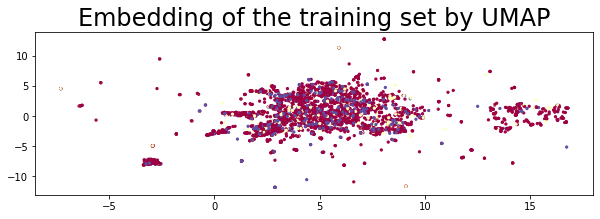

In [70]:
import umap
import matplotlib.pyplot as plt
colors = train_metadata['Label_number']
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(train_data)  # norm_train
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=colors, cmap='Spectral')  # c=y_train
plt.rcParams['figure.figsize'] = (10,3)
plt.title('Embedding of the training set by UMAP', fontsize=24)

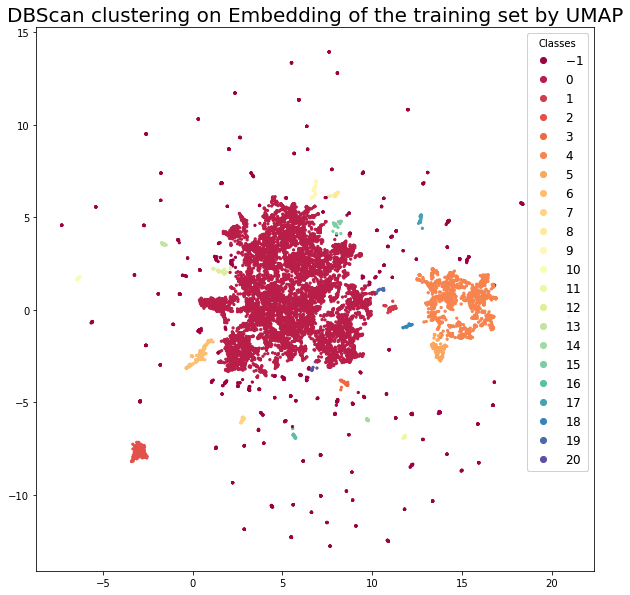


==============================Exploring cluster 0 of size 10175============================
REPRESENTATIVE POINT LOCATION:  [4.1400666 1.1777185]
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T',)
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  TAM  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ('74', '106', '184')  | Cocktail:  ('3TC', 'ABC', 'AZT', 'DDI', 'EFV')
Label:  TAM  | Cluster:  0  | Rep. Mutation Positions:  ('215',)  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ('103', '184')  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()

==============

In [71]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=.4, min_samples=30).fit(trans.embedding_)

plt.rcParams['figure.figsize'] = (10,10)
fig, ax = plt.subplots()
scatter = ax.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=clustering.labels_, cmap='Spectral')
legend1 = ax.legend(*scatter.legend_elements(num=len(set(clustering.labels_))), loc="best", title="Classes", prop={'size': 12})
ax.add_artist(legend1)
# ax.set(facecolor = "black")
plt.title('DBScan clustering on Embedding of the training set by UMAP', fontsize=20);
plt.show()

plt.rcParams['figure.figsize'] = (10,3)

# pick some samples to decode
visitedClusters = []
num_show = 10
for core_index in clustering.core_sample_indices_:
    cluster = clustering.labels_[core_index]
    if cluster in visitedClusters:   #norm_metadata
        continue
    visitedClusters.append(cluster)
    print(f"\n==============================Exploring cluster {cluster} of size {len([i for i in clustering.labels_ if i == cluster])}============================")

    midpoint = trans.embedding_[core_index]

    # find closest points to midpoint
    points = np.array(trans.embedding_)
    distances = np.linalg.norm(points - np.array([midpoint]), axis=1)
    close_indices = np.argsort(distances)[0:num_show]
    closest = np.array([points[i] for i in close_indices])
    distances = sorted(distances)


    # scatter = plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=clustering.labels_, cmap='Spectral')
    # plt.title(f'DBScan clustering on Embedding of the training set by UMAP - Cluster {cluster}', fontsize=16);
    # plt.figure(figsize=(300,300))
    # plt.show()

    # print metadata for each close point
    print("REPRESENTATIVE POINT LOCATION: ", midpoint)
    for i in range(0,len(closest)): 
        row = train_metadata.iloc[close_indices[i]]   # #norm_metadata
        print("Label: ", row['Label'], " | Cluster: ", clustering.labels_[close_indices[i]], " | Rep. Mutation Positions: ", row['Positions mutated'],  " | Cocktail: ", row['Cocktail'])

In [ ]:
seen = {}
for i in range(len(clustering.labels_)):
    cluster = clustering.labels_[i]
    if cluster not in seen:
        seen[cluster] = []
    seq = train_metadata.iloc[i]['Sequence']  # norm_metadata  
    seen[cluster].append((i, seq))

for cluster in seen.keys():
    print(f"{len(seen[cluster])}")  # Number of sequences in cluster {cluster}: 

In [468]:
import statistics
def get_cluster_mutation_distributions(clustering, metadata):
    cluster_mut_freqs = [{} for i in range(max(clustering.labels_)+1)] 
    cluster_med_freqs = [{} for i in range(max(clustering.labels_)+1)] 
    cluster_years = [[] for i in range(max(clustering.labels_)+1)] 
    
    for mut in representative_mutations.keys():
        for clust in cluster_mut_freqs:
            clust[mut] = 0
    for i in range(len(clustering.labels_)):
        cluster = clustering.labels_[i]
        if cluster < 0:
            continue
            
        cocktail = np.array(metadata.iloc[i]['Cocktail'])  # # norm_metadata   
        for med in cocktail:
            if med in cluster_med_freqs[cluster]:
                cluster_med_freqs[cluster][med] += 1
            else:
                cluster_med_freqs[cluster][med] = 1
                
        seq = metadata.iloc[i]['Sequence']    # norm_metadata   
#         _, mutations = get_represented_drugs(reference, seq)
        mutations = get_mutations(reference, seq)
        for mutation in mutations:
            if mutation in cluster_mut_freqs[cluster]:
                cluster_mut_freqs[cluster][mutation] += 1
            else:
                cluster_mut_freqs[cluster][mutation] = 1
                
        year = int(metadata.iloc[i]['Year'])
        cluster_years[cluster].append(year)
        
            
    return cluster_mut_freqs, cluster_med_freqs, cluster_years
        
    
import collections

def plot_cluster_mutation_distributions(clustering, metadata, seen):
    cluster_mut_freqs, cluster_med_freqs, cluster_years = get_cluster_mutation_distributions(clustering, metadata)
    
    # Figure out which mutations to keep (must be above 1/3 frequency)
    keep = []
    for mut_freqs in cluster_mut_freqs:
        max_value = max(mut_freqs.values())
        min_freq = int(0.3 * max_value) + 3
        for key in mut_freqs.keys():
            if mut_freqs[key] > min_freq:
                keep.append(key)
    keep.append('184')
                
    # Set key to 0 for non-present mutations
    for mut_freqs in cluster_mut_freqs:
        for key in keep:
            if key not in mut_freqs:
                mut_freqs[key] = 0
        # scale frequencies
        max_value = max(mut_freqs.values()) if max(mut_freqs.values()) > 0 else 1
        for key in mut_freqs:
            mut_freqs[key] /= max_value
                
                
    all_meds = [med for meds in cluster_med_freqs for med in meds.keys()]
    # Set key to 0 for non-present medications
    for med_freqs in cluster_med_freqs:
        for key in all_meds:
            if key not in med_freqs:
                med_freqs[key] = 0
        # scale frequencies
        max_value = max(med_freqs.values()) if max(med_freqs.values()) > 0 else 1
        for key in med_freqs:
            med_freqs[key] /= max_value
            
        
            
    i = -1
    import matplotlib
    matplotlib.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(len(cluster_mut_freqs), 2, figsize=(50,50))
    fig.subplots_adjust(left=0.1,
                        bottom=0.4, 
                        right=0.4, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4
                        )
    fig.tight_layout()
    
    for mut_freqs, med_freqs, year_freqs in zip(cluster_mut_freqs, cluster_med_freqs, cluster_years):
        i += 1
        cluster = cluster_mut_freqs.index(mut_freqs)
        print(f"Cluster {cluster} includes sequences from {min(year_freqs)} to {max(year_freqs)} with mean year of {round(statistics.mean(year_freqs))}")
    
        filter_over_5 = {k:v for k,v in mut_freqs.items() if k in keep and int(k) < 230} 
        number = {k:int(k) for k in mut_freqs.keys()}
        ks = sorted(filter_over_5, key=number.__getitem__)
        vals = [filter_over_5[k] for k in ks]
        ax[i, 0].set_title(f"Frequency of mutations in cluster {cluster} with {len(seen[cluster])} sequences", size=25)
        ax[i, 0].bar(ks, vals, color='g')
        ax[i, 0].set_ylabel(f"Cluster {cluster}")
        
        ks = sorted(med_freqs.keys())
        vals = [med_freqs[k] for k in ks]        
        ax[i, 1].set_title(f"Frequency of known prescribed medicines in cluster {cluster_mut_freqs.index(mut_freqs)}", size=25)
        ax[i, 1].set_ylim(0,1.0)
        ax[i, 1].bar(ks, vals, color='g')
        
        
        
        
    # i = -1
    # import matplotlib
    # matplotlib.rcParams.update({'font.size': 22})
#     fig, ax = plt.subplots(8, 2, figsize=(50,30))
#     fig.subplots_adjust(left=0.1,
#                         bottom=0.3, 
#                         right=0.4, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4
#                         )
#     fig.tight_layout()
    
#     for mut_freqs, med_freqs, year_freqs in zip(cluster_mut_freqs, cluster_med_freqs, cluster_years):
#         i += 1
#         cluster = cluster_mut_freqs.index(mut_freqs)
#         if cluster not in [2, 5, 8, 9, 12, 15, 18, 20]:
#             i -= 1
#             continue
#         print(f"Cluster {cluster} includes sequences from {min(year_freqs)} to {max(year_freqs)} with mean year of {round(statistics.mean(year_freqs))}")
    
#         filter_over_5 = {k:v for k,v in mut_freqs.items() if k in keep and int(k) < 230} 
#         number = {k:int(k) for k in mut_freqs.keys()}
#         ks = sorted(filter_over_5, key=number.__getitem__)
#         vals = [filter_over_5[k] for k in ks]
#         if i == 0:
#             ax[i, 0].set_title(f"Frequency of mutations", size=40)
#         ax[i, 0].bar(ks, vals, color='g')
#         ax[i, 0].set_ylabel(f"Cluster {cluster}", size=36)
#         ax[i, 0].set_yticks([0,0.5,1]) 
#         for tick in ax[i, 0].get_yticklabels():
#             # tick.set_rotation(90)
#             tick.set_size(32)
#         if i != 7:
#             if i == 0:
#                 ax[i, 0].xaxis.tick_top()
#             else:
#                 ax[i, 0].set_xticks([])
#         for tick in ax[i, 0].get_xticklabels():
#             tick.set_rotation(90)
#             tick.set_size(40)
        
#         ks = sorted(med_freqs.keys())
#         vals = [med_freqs[k] for k in ks]        
#         if i == 0:
#             ax[i, 1].set_title(f"Frequency of known prescribed medicines", size=40)
#         ax[i, 1].set_ylim(0,1.0)
#         ax[i, 1].set_yticks([0,0.5,1])  
#         ax[i, 1].bar(ks, vals, color='g')
#         for tick in ax[i, 1].get_yticklabels():
#             # tick.set_rotation(90)
#             tick.set_size(32)
#         if i != 7:
#             if i == 0:
#                 ax[i, 1].xaxis.tick_top()
#             else:
#                 ax[i, 1].set_xticks([])
#         for tick in ax[i, 1].get_xticklabels():
#             tick.set_rotation(90)
#             tick.set_size(40)
        
        
#     i = -1
#     import matplotlib
#     matplotlib.rcParams.update({'font.size': 22})
#     fig, ax = plt.subplots(len(cluster_mut_freqs) - 8, 2, figsize=(50,30))
#     fig.subplots_adjust(left=0.1,
#                         bottom=0.3, 
#                         right=0.4, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4
#                         )
#     fig.tight_layout()
    
#     for mut_freqs, med_freqs, year_freqs in zip(cluster_mut_freqs, cluster_med_freqs, cluster_years):
#         i += 1
#         cluster = cluster_mut_freqs.index(mut_freqs)
#         if cluster in [2, 5, 8, 9, 12, 15, 18, 20]:
#             i -= 1
#             continue
#         print(f"Cluster {cluster} includes sequences from {min(year_freqs)} to {max(year_freqs)} with mean year of {round(statistics.mean(year_freqs))}")
    
#         filter_over_5 = {k:v for k,v in mut_freqs.items() if k in keep and int(k) < 230} 
#         number = {k:int(k) for k in mut_freqs.keys()}
#         ks = sorted(filter_over_5, key=number.__getitem__)
#         vals = [filter_over_5[k] for k in ks]
#         if i == 0:
#             ax[i, 0].set_title(f"Frequency of mutations", size=40)
#         ax[i, 0].bar(ks, vals, color='g')
#         ax[i, 0].set_ylabel(f"Cluster {cluster}", size=30)
#         ax[i, 0].set_yticks([0,0.5,1]) 
#         for tick in ax[i, 0].get_yticklabels():
#             # tick.set_rotation(90)
#             tick.set_size(32)
#         if i != len(cluster_mut_freqs) - 9:
#             if i == 0:
#                 ax[i, 0].xaxis.tick_top()
#             else:
#                 ax[i, 0].set_xticks([])
#         for tick in ax[i, 0].get_xticklabels():
#             tick.set_rotation(90)
#             tick.set_size(40)
        
#         ks = sorted(med_freqs.keys())
#         vals = [med_freqs[k] for k in ks]        
#         if i == 0:
#             ax[i, 1].set_title(f"Frequency of known prescribed medicines", size=40)
#         ax[i, 1].set_ylim(0,1.0)
#         ax[i, 1].set_yticks([0,0.5,1]) 
        
#         ax[i, 1].bar(ks, vals, color='g')
#         for tick in ax[i, 1].get_yticklabels():
#             # tick.set_rotation(90)
#             tick.set_size(32)
#         if i != len(cluster_mut_freqs) - 9:
#             if i == 0:
#                 ax[i, 1].xaxis.tick_top()
#             else:
#                 ax[i, 1].set_xticks([])
#         for tick in ax[i, 1].get_xticklabels():
#             tick.set_rotation(90)
#             tick.set_size(40)
        


Cluster 2 includes sequences from 1998 to 2011 with mean year of 2006
Cluster 5 includes sequences from 1995 to 2015 with mean year of 2010
Cluster 8 includes sequences from 2006 to 2015 with mean year of 2010
Cluster 9 includes sequences from 1998 to 2015 with mean year of 2008
Cluster 12 includes sequences from 1999 to 2015 with mean year of 2010
Cluster 15 includes sequences from 2002 to 2015 with mean year of 2009
Cluster 18 includes sequences from 2005 to 2015 with mean year of 2011
Cluster 20 includes sequences from 2003 to 2013 with mean year of 2011
Cluster 0 includes sequences from 1987 to 2017 with mean year of 2006
Cluster 1 includes sequences from 1995 to 2017 with mean year of 2008
Cluster 3 includes sequences from 2002 to 2015 with mean year of 2011
Cluster 4 includes sequences from 1997 to 2015 with mean year of 2010
Cluster 6 includes sequences from 1996 to 2016 with mean year of 2005
Cluster 7 includes sequences from 2001 to 2015 with mean year of 2008
Cluster 10 inclu

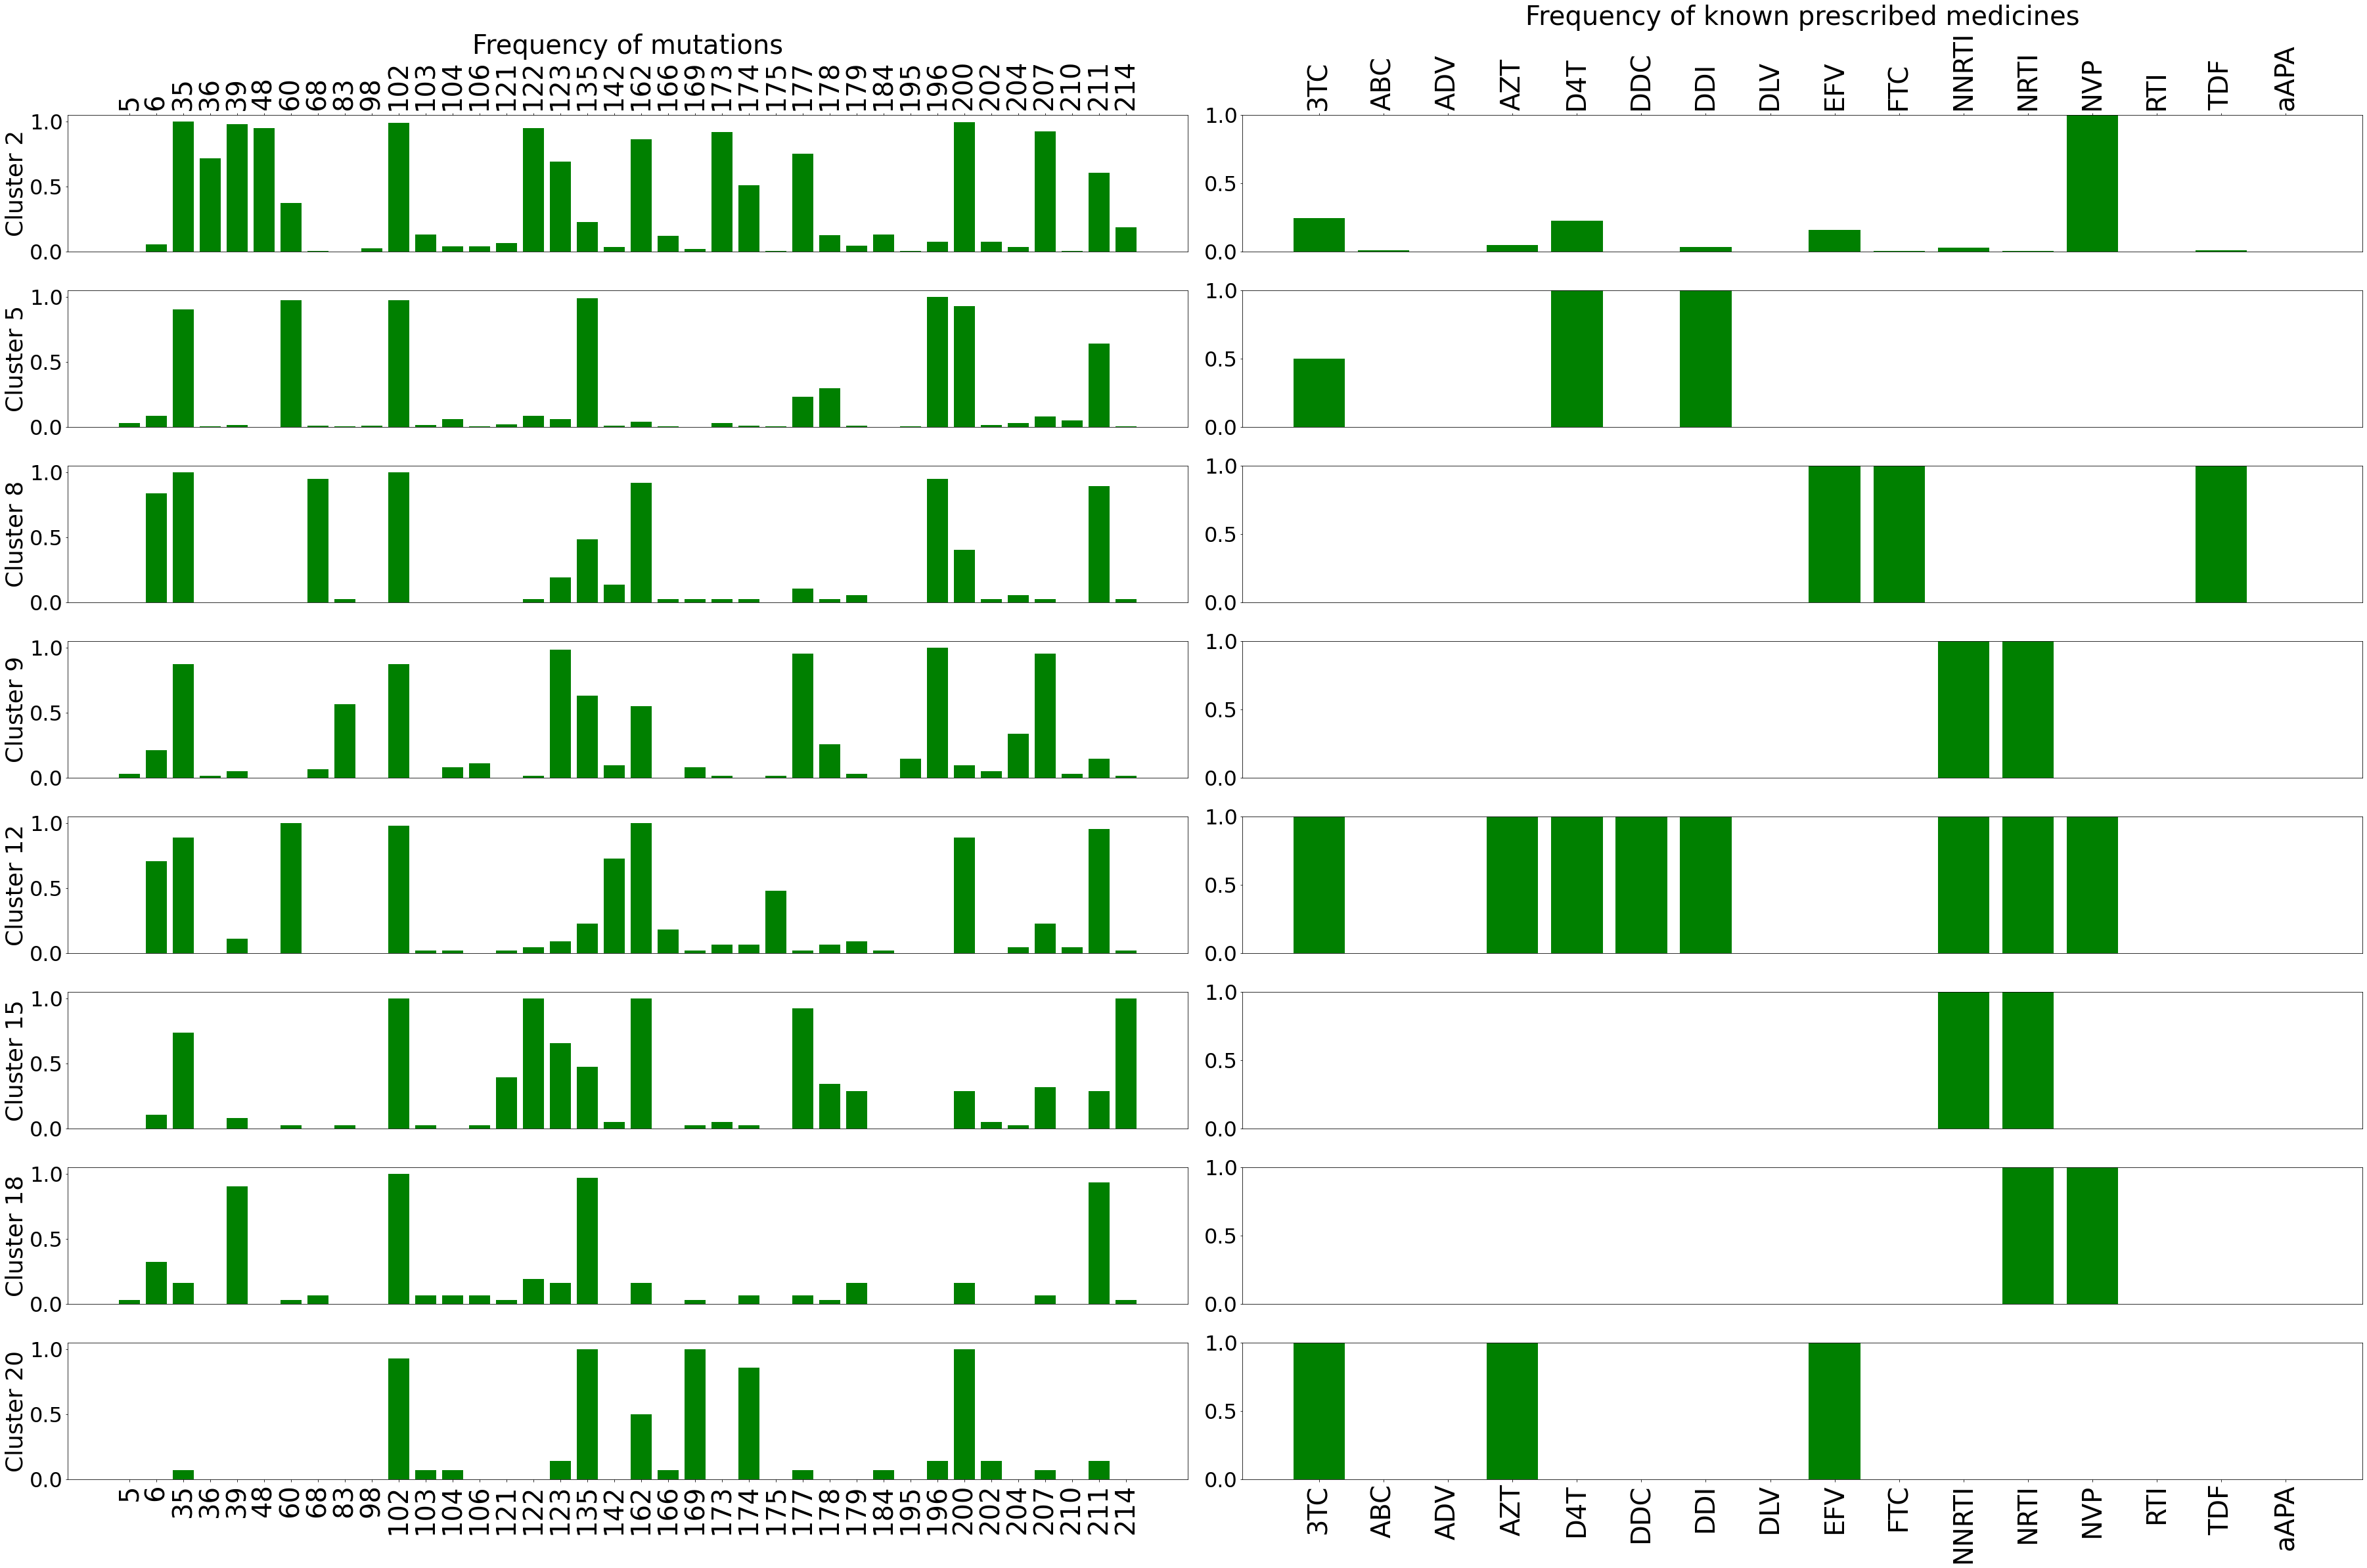

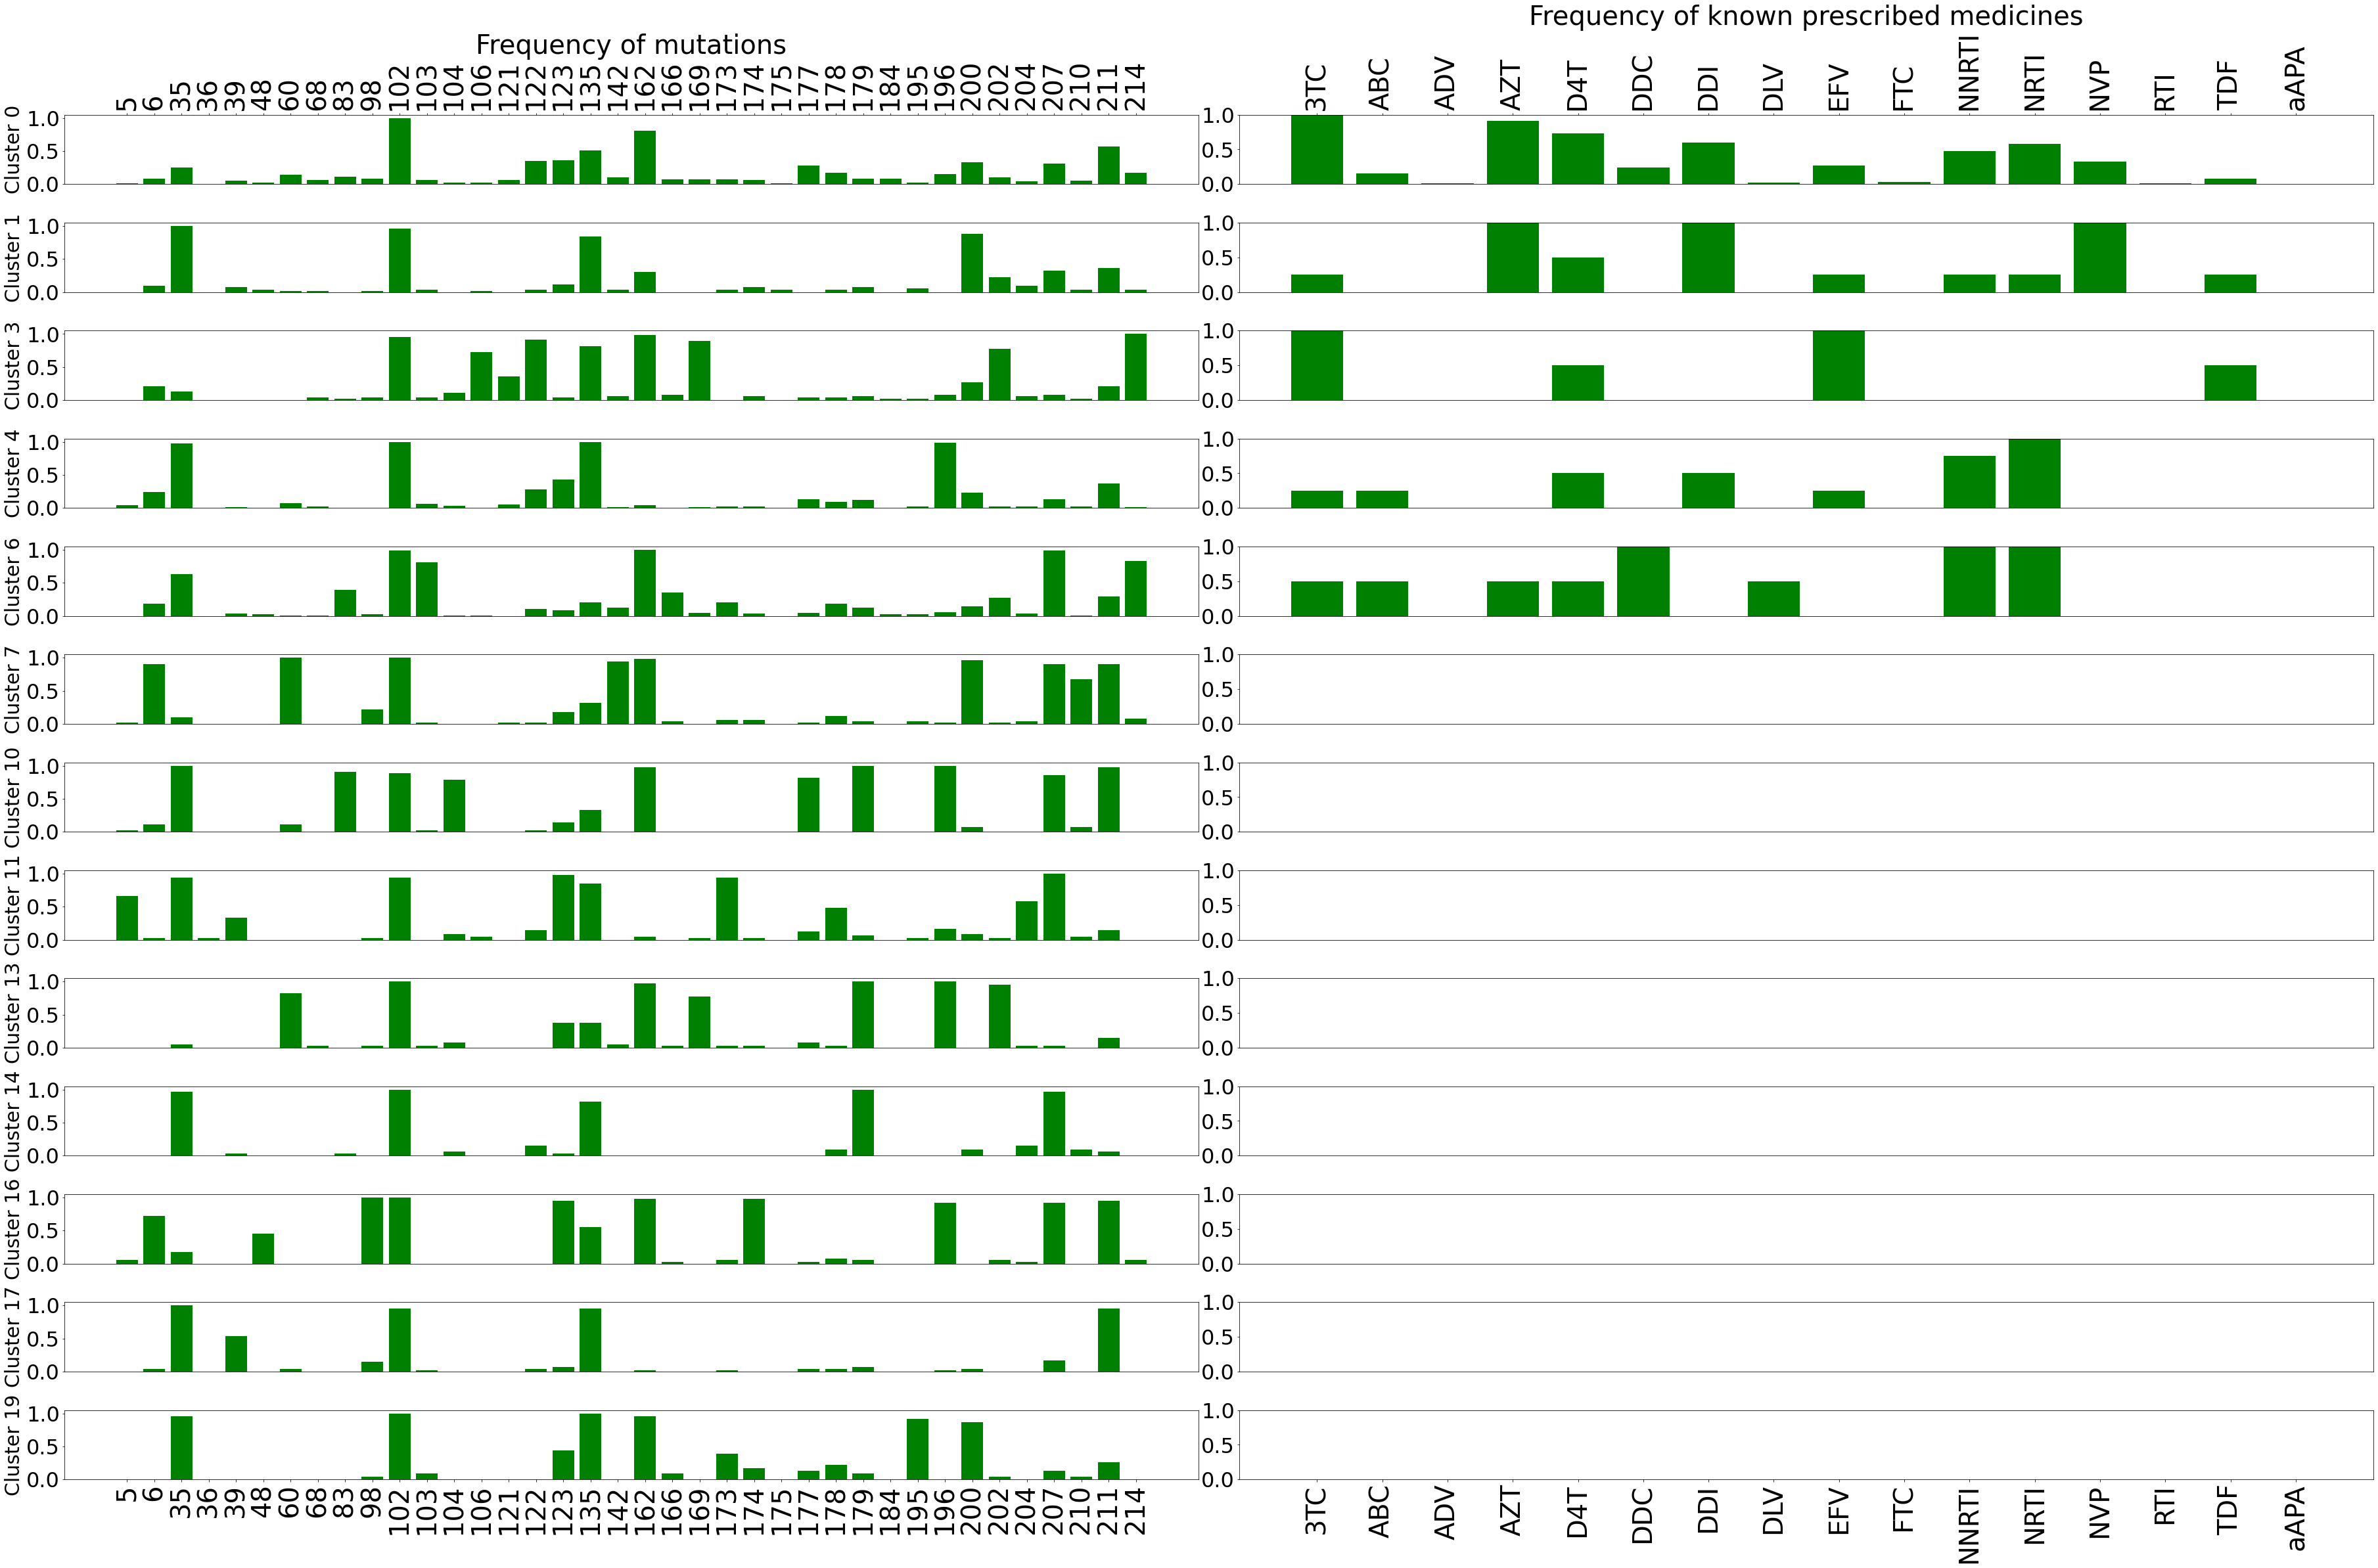

In [432]:
plot_cluster_mutation_distributions(clustering, train_metadata, seen)

In [176]:
# Save this clustering

import pickle

clsterng = {}

for i in range(len(clustering.labels_)):
    clsterng[i] = clustering.labels_[i]  


with open('saved_clustering.pkl', 'wb') as handle:
    pickle.dump(clsterng, handle)




In [127]:
def explore_cluster(cl_i, metadata):
    print("===========Representative sequence from each study in this cluster===============\n")
    info = []
    studies = set()
    patients = set()
    for i, seq in seen[cl_i]:
        all_mut = get_mutations(reference, seq)
        drugs, rep_mut = get_represented_drugs(reference, seq)
        non_rep_muts = sorted([int(mut) for mut in all_mut if mut not in rep_mut])
        cocktail = metadata.iloc[i]['Cocktail']  
        meta = metadata.iloc[i]['Patient info']  
        dash = metadata.iloc[i]['Dash count'] 
        
        study = re.split("_", meta)[0]
        patient = re.split("_", meta)[1]
        patients.add(patient)
        if study not in studies:
            studies.add(study)
#             print(metadata.iloc[i]['Sequence'], '\n')     # uncomment to view smaple sequence for each study
        
        info.append([meta, drugs, rep_mut, non_rep_muts, cocktail, dash])
    info = pd.DataFrame(info, columns=['Patient info', 'Rep. Mutation Type', 'Representative mutations', 'Other mutations', 'Cocktail', 'Dash count'])
    print(f"{len(studies)} different studies observed in this cluster", studies, "\n")
    print(f"{len(patients)} different patients observed in this cluster: ") #, patients, "\n")
    return info

info = explore_cluster(4, train_metadata)  # norm_metadata
pd.set_option('display.max_colwidth', None)
info.sample(10) #clusters 4, 5, 8, 

===========Representative sequence from each study in this cluster===============

38 different studies observed in this cluster {'>2389', '>2576', '>2348', '>2173', '>2495', '>2250', '>1696', '>2299', '>2333', '>2335', '>2311', '>2130', '>2142', '>2357', '>2035', '>2136', '>1739', '>1973', '>1769', '>2290', '>2650', '>2155', '>2231', '>1573', '>2394', '>1025', '>1612', '>2419', '>2323', '>2428', '>2073', '>2081', '>2080', '>1768', '>2127', '>2133', '>1673', '>1703'} 

1737 different patients observed in this cluster: 


,Patient info,Rep. Mutation Type,Representative mutations,Other mutations,Cocktail,Dash count
1183,>2576_213988_LC162082_2013_B__None,[nnRTI],[103],"[35, 102, 135, 177, 196, 200, 207]",(),0
1217,>2576_214093_LC162187_2014_B__None,[],[],"[35, 102, 123, 135, 196]",(),0
194,>2080_111325_RJ2-0069_2009_B__None,[],[],"[35, 102, 104, 135, 138, 196, 197]",(),0
1393,>2576_214708_LC162452_2014_B__None,[],[],"[35, 102, 123, 135, 178, 196]",(),0
764,>2495_193377_F12-5112488-1_2012_B__None,[],[],"[11, 35, 102, 121, 123, 135, 195, 196, 207, 211]",(),0
170,>1768_106597_F04-5103-151-1_2004_B__None,[],[],"[23, 35, 40, 102, 123, 135, 196, 211]",(),0
1660,>2576_215567_LC170722_2013_B__None,[TAM],[215],"[6, 102, 123, 135, 196, 200, 211]",(),0
648,>2495_192852_C12-51111286-1_2012_B__None,[],[],"[6, 35, 102, 123, 135, 177, 196, 207, 211]",(),0
990,>2495_194359_F12-5112525-1_2012_B__None,[],[],"[35, 102, 122, 135, 196, 207]",(),0
1134,>2576_213688_LC161782_2013_B__None,[],[],"[6, 35, 102, 135, 162, 196, 237]",(),0


In [346]:
# Explore longitudinally
aligned_seqs = pd.read_csv('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.csv')
aligned_seqs = aligned_seqs.drop(columns='Unnamed: 0')  # Drop index column
aligned_seqs.head(100)
byposition = aligned_seqs['Sequence'].apply(lambda x:pd.Series(list(x)[:230]))
byposition.describe()
aligned_seqs = aligned_seqs[byposition[0] != '-']
aligned_seqs = aligned_seqs[byposition[0] != 'X']
aligned_seqs = aligned_seqs[byposition[229] != '-']
aligned_seqs = aligned_seqs[byposition[229] != 'X']
byposition = byposition[byposition[0] != '-']
byposition = byposition[byposition[0] != 'X']
byposition = byposition[byposition[229] != '-']
byposition = byposition[byposition[229] != 'X']
onehot = pd.get_dummies(byposition)
aligned_seqs = aligned_seqs.join(onehot)
train_metadata1 = aligned_seqs[['Patient info', 'Sequence']]
train_data1 = aligned_seqs.drop(columns=['Patient info', 'Sequence'])
cols_to_drop = [col for col in train_data1.columns if "-" in col]
train_data1.drop(columns=cols_to_drop, inplace=True)
patient_number = []
study_number = []

for seq in train_metadata1.iterrows():
    info = str(seq[1]['Patient info']).replace(">", "").strip()
    study = info.split("_")[0]
    patient = info.split("_")[1]
    patient_number.append(f"{study}_{patient}")
    study_number.append(study)

train_metadata1['PatientID'] = patient_number
train_metadata1['StudyID'] = study_number

train_metadata1 = train_metadata1[['Patient info', 'PatientID', 'StudyID', 'Sequence']]


def explore_long(cl_i, metadata):
    print("===========Explore longitudinal mutations in this cluster===============\n")
    patids = set()
    for i, seq in seen[cl_i]:
        patid = metadata.iloc[i]['PatientID']
        patids.add(patid)
    print(f"Extracted patient ids from {len(patids)} sequences")
    
    info = []
    for patid in patids:
        # Get all sequences for this patient
        allseqs = train_metadata1[train_metadata1['PatientID'] == patid]
        for seq in allseqs.iterrows():
            info.append([seq[1]['Patient info'], seq[1]['PatientID'], seq[1]['StudyID'], seq[1]['Sequence']])
        
    info = pd.DataFrame(info, columns=['Patient info', 'PatientID', 'StudyID', 'Sequence'])
    
    return info


<ipython-input-346-466b46a340c2>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[0] != 'X']
<ipython-input-346-466b46a340c2>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[229] != '-']
<ipython-input-346-466b46a340c2>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[229] != 'X']
<ipython-input-346-466b46a340c2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata1['PatientID'] = patient_number
<ipython-input-346-466b46a340c2>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

===========Explore longitudinal mutations in this cluster===============

Extracted patient ids from 375 sequences


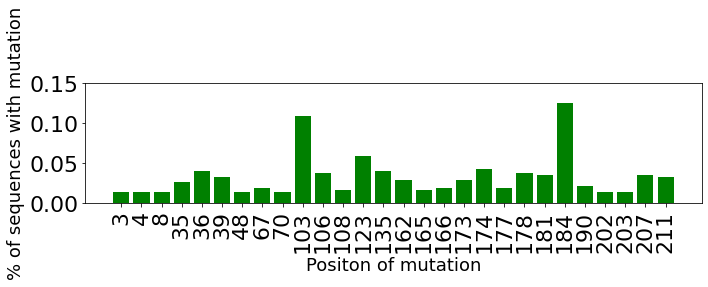

In [450]:
def get_pres(info):
    info = seq[1]['Patient info']
    drugs = info.split("__")[1]
    re_match = re.findall(r"(?P<drug>([A-Z0-9a-z)]+))", drugs)
    drugs = [match[0] for match in re_match if match[0] != 'None' and match[0] != 'Unknown']
    return drugs

cl = 2
info = explore_long(cl, train_metadata)  # norm_metadata

last_info = info.drop_duplicates(subset=['PatientID'], keep='last')
first_info = info.drop_duplicates(subset=['PatientID'], keep='first')

i = 0
hist = {}
# histdrugs = {}
for firstseq, lastseq in zip(first_info.iterrows(), last_info.iterrows()):
    muts = get_mutations(firstseq[1]['Sequence'], lastseq[1]['Sequence'])
    # figure out what additional drugs were prescribed for each mutation position 
    for mut in muts:
        if mut not in hist:
            hist[mut] = 1
            # histdrugs[mut] = get_pres(lastseq)
        else:
            hist[mut] +=1
            # histdrugs[mut] += get_pres(lastseq)

# if not hist.values():
#     continue
keep = []
max_value = max(hist.values())   #if hist.values() else 0
min_freq = int(0.1 * max_value)
for key in hist.keys():
    if hist[key] > min_freq:
        keep.append(key)
        # mut_freqs[key] /= max_value
    # else:
    #     histdrugs.pop(key)
        
# for mut in histdrugs.keys():
#     if int(mut) <= 230:
#         print(f"Mutation {mut} has extra prescribed drugs: {[(drug, round(histdrugs[mut].count(drug)*100/len(histdrugs[mut]))) for drug in set(histdrugs[mut])]}")

filter_over_5 = {k:v for k,v in hist.items() if k in keep and int(k) <= 230} 
number = {k:int(k) for k in hist.keys()}               
ks = sorted(filter_over_5, key=number.__getitem__)
vals = [filter_over_5[k] for k in ks]

plt.xticks(rotation='vertical')
# plt.title(f"Frequency of longitudinal mutations in cluster {cl} with {len(seen[cl])} sequences")
fig = plt.bar(ks, [val/375 for val in vals], color='g')
plt.tight_layout()
plt.ylim(0, 0.15)
plt.yticks([0, 0.05, 0.1, 0.15])
plt.xlabel('Positon of mutation', size=18)
plt.ylabel('% of sequences with mutation', size=18)
plt.savefig(f'cluster{cl}_long.png')
plt.show()

In [435]:
# all_long = []
# for cl in range(0,21):
#     all_long.append(explore_long(cl, train_metadata))

In [434]:
# def get_cluster_mutation_distributions_long(clustering, metadata):
#     cluster_mut_freqs = [{} for i in range(max(clustering.labels_)+1)] 
#     cluster_med_freqs = [{} for i in range(max(clustering.labels_)+1)] 
#     cluster_years = [[] for i in range(max(clustering.labels_)+1)] 
    
#     for mut in representative_mutations.keys():
#         for clust in cluster_mut_freqs:
#             clust[mut] = 0
#     for i in range(len(clustering.labels_)):
#         cluster = clustering.labels_[i]
#         if cluster < 0:
#             continue
#         # print("ON CLUSTER:", cluster)
#         info = all_long[cluster]  # norm_metadata
#         last_info = info.drop_duplicates(subset=['PatientID'], keep='last')
#         first_info = info.drop_duplicates(subset=['PatientID'], keep='first')
#         firstseq = first_info[first_info['PatientID'] == metadata.iloc[i]['PatientID']]
#         lastseq = last_info[last_info['PatientID'] == metadata.iloc[i]['PatientID']]

            
#         cocktail = np.array(metadata.iloc[i]['Cocktail'])  # # norm_metadata   
#         for med in cocktail:
#             if med in cluster_med_freqs[cluster]:
#                 cluster_med_freqs[cluster][med] += 1
#             else:
#                 cluster_med_freqs[cluster][med] = 1
                

#         muts = get_mutations(firstseq['Sequence'], lastseq['Sequence'])
#         for mutation in muts:
#             if mutation in cluster_mut_freqs[cluster]:
#                 cluster_mut_freqs[cluster][mutation] += 1
#             else:
#                 cluster_mut_freqs[cluster][mutation] = 1
                
#         year = int(metadata.iloc[i]['Year'])
#         cluster_years[cluster].append(year)
        
            
#     return cluster_mut_freqs, cluster_med_freqs, cluster_years
        
    
# import collections

# def plot_cluster_mutation_distributions_long(clustering, metadata, seen):
#     cluster_mut_freqs, cluster_med_freqs, cluster_years = get_cluster_mutation_distributions_long(clustering, metadata)
    
#     # Figure out which mutations to keep (must be above 1/3 frequency)
#     keep = []
#     for mut_freqs in cluster_mut_freqs:
#         max_value = max(mut_freqs.values())
#         min_freq = 0  #int(0.3 * max_value) + 3
#         for key in mut_freqs.keys():
#             if mut_freqs[key] > min_freq:
#                 keep.append(key)
#     keep.append('184')
                
#     # Set key to 0 for non-present mutations
#     for mut_freqs in cluster_mut_freqs:
#         for key in keep:
#             if key not in mut_freqs:
#                 mut_freqs[key] = 0
#         # scale frequencies
#         max_value = max(mut_freqs.values()) if max(mut_freqs.values()) > 0 else 1
#         for key in mut_freqs:
#             mut_freqs[key] /= max_value
                
                
#     all_meds = [med for meds in cluster_med_freqs for med in meds.keys()]
#     # Set key to 0 for non-present medications
#     for med_freqs in cluster_med_freqs:
#         for key in all_meds:
#             if key not in med_freqs:
#                 med_freqs[key] = 0
#         # scale frequencies
#         max_value = max(med_freqs.values()) if max(med_freqs.values()) > 0 else 1
#         for key in med_freqs:
#             med_freqs[key] /= max_value
            
        
            
#     i = -1
#     import matplotlib
#     matplotlib.rcParams.update({'font.size': 22})
#     fig, ax = plt.subplots(len(cluster_mut_freqs), 2, figsize=(50,50))
#     fig.subplots_adjust(left=0.1,
#                         bottom=0.4, 
#                         right=0.4, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4
#                         )
#     fig.tight_layout()
    
#     for mut_freqs, med_freqs, year_freqs in zip(cluster_mut_freqs, cluster_med_freqs, cluster_years):
#         i += 1
#         cluster = cluster_mut_freqs.index(mut_freqs)
#         print(f"Cluster {cluster} includes sequences from {min(year_freqs)} to {max(year_freqs)} with mean year of {round(statistics.mean(year_freqs))}")
    
#         filter_over_5 = {k:v for k,v in mut_freqs.items() if k in keep and int(k) < 230} 
#         number = {k:int(k) for k in mut_freqs.keys()}
#         ks = sorted(filter_over_5, key=number.__getitem__)
#         vals = [filter_over_5[k] for k in ks]
#         ax[i, 0].set_title(f"Frequency of mutations in cluster {cluster} with {len(seen[cluster])} sequences", size=25)
#         ax[i, 0].bar(ks, vals, color='g')
#         ax[i, 0].set_ylabel(f"Cluster {cluster}")
        
#         ks = sorted(med_freqs.keys())
#         vals = [med_freqs[k] for k in ks]        
#         ax[i, 1].set_title(f"Frequency of known prescribed medicines in cluster {cluster_mut_freqs.index(mut_freqs)}", size=25)
#         ax[i, 1].set_ylim(0,1.0)
#         ax[i, 1].bar(ks, vals, color='g')

In [433]:
# plot_cluster_mutation_distributions_long(clustering, train_metadata, seen)

# Compute homogeneity index

In [475]:
# Idea: for each cluster, need prop (total # of mutations or drugs w freq > 50%) / (total # mutated positions or drugs observed)

cluster_mut_freqsh, cluster_med_freqsh, _ = get_cluster_mutation_distributions(sub_clustering, cluster1_metadata)

i = 0
for med_freqh in cluster_med_freqsh:
    # for each cluster
    max_valueh = max(med_freqh.values()) if med_freqh.values() else 0
    total_drugs_over_50 = len([key for key in med_freqh.keys() if med_freqh[key] > max_valueh * 0.5])
    # total_drugs_over_10 = len([key for key in med_freqh.keys() if med_freqh[key] > max_valueh * 0.1])
    total_drugs = len(med_freqh.keys())
    index = total_drugs_over_50 / total_drugs if total_drugs > 0 else 1.0
    # print(f"Homogeneity of drugs for cluster {i}:", index)
    print(index)
    i += 1

1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0


In [476]:
# Idea: for each cluster, need prop (total # of mutations w freq > 50%) / (total # mutated positions observed)

i = 0
for mut_freqh in cluster_mut_freqsh:
    # for each cluster
    max_valueh = max(mut_freqh.values()) if mut_freqh.values() else 0
    total_muts_over_50 = len([key for key in mut_freqh.keys() if mut_freqh[key] > max_valueh * 0.5])
    total_muts = len(mut_freqh.keys())
    index = total_muts_over_50 / total_muts if total_muts > 0 else 1.0
    # print(f"Homogeneity of mutations for cluster {i}:", index)
    print(index)
    i += 1

0.07936507936507936
0.04938271604938271
0.06896551724137931
0.08620689655172414
0.0625
0.08064516129032258
0.0847457627118644
0.10909090909090909


In [453]:
def compute_homogeneity_indexes(metadata):
    cluster_mut_freqs = {} 
    cluster_med_freqs = {} 
    
    for mut in representative_mutations.keys():
        cluster_mut_freqs[mut] = 0
    
    for i in range(1, metadata.shape[0]):
        cocktail = np.array(metadata.iloc[i]['Cocktail'])   
        for med in cocktail:
            if med in cluster_med_freqs:
                cluster_med_freqs[med] += 1
            else:
                cluster_med_freqs[med] = 1

        seq = metadata.iloc[i]['Sequence']    # norm_metadata   

        mutations = get_mutations(reference, seq)
        for mutation in mutations:
            if mutation in cluster_mut_freqs:
                cluster_mut_freqs[mutation] += 1
            else:
                cluster_mut_freqs[mutation] = 1
            
    i = 0
    med_index = 0
    med_freqh = cluster_med_freqs
    # for each cluster
    max_valueh = max(med_freqh.values()) if med_freqh.values() else 0
    total_drugs_over_50 = len([key for key in med_freqh.keys() if med_freqh[key] > max_valueh * 0.5])
    total_drugs = len(med_freqh.keys())
    med_index = total_drugs_over_50 / total_drugs if total_drugs > 0 else 1.0
    print(f"Homogeneity of drugs for cluster {i}:", med_index)
        
    mut_index = 0
    mut_freqh = cluster_mut_freqs
    # for each cluster
    max_valueh = max(mut_freqh.values()) if mut_freqh.values() else 0
    total_muts_over_50 = len([key for key in mut_freqh.keys() if mut_freqh[key] > max_valueh * 0.5])
    total_muts = len(mut_freqh.keys())
    mut_index = total_muts_over_50 / total_muts if total_muts > 0 else 1.0
    print(f"Homogeneity of mutations for cluster {i}:", mut_index)
    # print(index)
        
    return mut_index, med_index
    

# Look deeper into large clusters

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

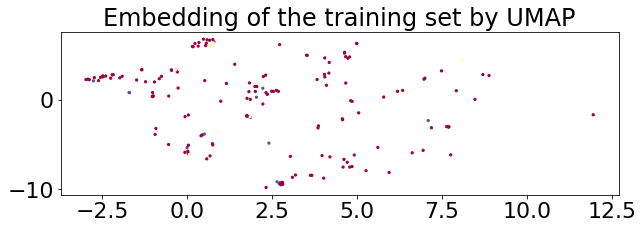

In [483]:
CLUSTER = 4

cluster1 = []
cluster1_metadata = []
indices = [index for (index, seq) in seen[CLUSTER]]
for ind in indices:
    cluster1_metadata.append(train_metadata.iloc[ind])  #norm_metadata
    cluster1.append(train_data.iloc[ind])  # norm_train

cluster1 = pd.DataFrame(cluster1)
cluster1_metadata = pd.DataFrame(cluster1_metadata)

colors = cluster1_metadata['Label_number']
trans = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=42).fit(cluster1)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=colors, cmap='Spectral')  # c=y_train
plt.title('Embedding of the training set by UMAP', fontsize=24)


In [471]:
set(sub_clustering.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}


==============================Exploring cluster 0============================
REPRESENTATIVE POINT LOCATION:  [1.2939776 0.9680037]
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T', 'DDI', 'NRTI')
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ('215',)  | Cocktail:  ()

==============================Exploring cluster 1============================


<Figure size 576x576 with 0 Axes>

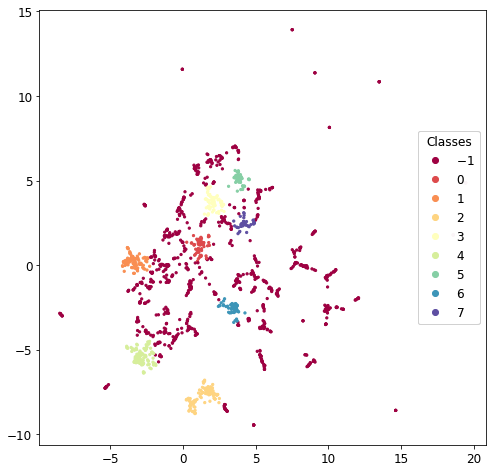

In [472]:
from sklearn.cluster import DBSCAN
sub_clustering = DBSCAN(eps=.6, min_samples=40).fit(trans.embedding_)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,8))

fig, ax = plt.subplots(figsize=(8,8))

scatter = ax.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=sub_clustering.labels_, cmap='Spectral')
legend2 = ax.legend(*scatter.legend_elements(num=len(set(sub_clustering.labels_))), loc="right", title="Classes")
ax.add_artist(legend2)

# plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=sub_clustering.labels_, cmap='Spectral')
# plt.legend(*scatter.legend_elements(num=len(set(sub_clustering.labels_))), loc="best", title="Classes")
# plt.title('DBScan clustering on Embedding of the training set by UMAP', fontsize=16);
# plt.show()

# pick some samples to decode
visitedClusters = []
num_show = 10
for core_index in sub_clustering.core_sample_indices_:
    cluster = sub_clustering.labels_[core_index]
    if cluster in visitedClusters:  # or not cluster1_metadata.iloc[core_index]['Cocktail']:
        continue
    visitedClusters.append(cluster)
    print(f"\n==============================Exploring cluster {cluster}============================")

    midpoint = trans.embedding_[core_index]

    # find closest points to midpoint
    points = np.array(trans.embedding_)
    distances = np.linalg.norm(points - np.array([midpoint]), axis=1)
    close_indices = np.argsort(distances)[0:num_show]
    closest = np.array([points[i] for i in close_indices])
    distances = sorted(distances)

    # print metadata for each close point
    print("REPRESENTATIVE POINT LOCATION: ", midpoint)
    for i in range(0,len(closest)): 
        row = cluster1_metadata.iloc[close_indices[i]]
        print("Label: ", row['Label'], " | Cluster: ", sub_clustering.labels_[close_indices[i]], " | Rep. Mutation Positions: ", row['Positions mutated'],  " | Cocktail: ", row['Cocktail'])
        

In [473]:
seen_sub = {}
for i in range(len(sub_clustering.labels_)):
    cluster = sub_clustering.labels_[i]
    if cluster not in seen_sub:
        seen_sub[cluster] = []
    seq = train_metadata.iloc[i]['Sequence']   
    seen_sub[cluster].append((i, seq))


for cluster in sorted(seen_sub.keys()):
    print(f"Number of sequences in cluster {cluster}: {len(seen_sub[cluster])}")

new_clust = sub_clustering

Number of sequences in cluster -1: 1030
Number of sequences in cluster 0: 76
Number of sequences in cluster 1: 119
Number of sequences in cluster 2: 118
Number of sequences in cluster 3: 88
Number of sequences in cluster 4: 133
Number of sequences in cluster 5: 59
Number of sequences in cluster 6: 63
Number of sequences in cluster 7: 51


Cluster 0 includes sequences from 1998 to 2015 with mean year of 2010
Cluster 1 includes sequences from 1999 to 2015 with mean year of 2009
Cluster 2 includes sequences from 2000 to 2015 with mean year of 2010
Cluster 3 includes sequences from 2000 to 2015 with mean year of 2011
Cluster 4 includes sequences from 2000 to 2015 with mean year of 2011
Cluster 5 includes sequences from 2001 to 2015 with mean year of 2010
Cluster 6 includes sequences from 2001 to 2015 with mean year of 2009
Cluster 7 includes sequences from 2002 to 2015 with mean year of 2010


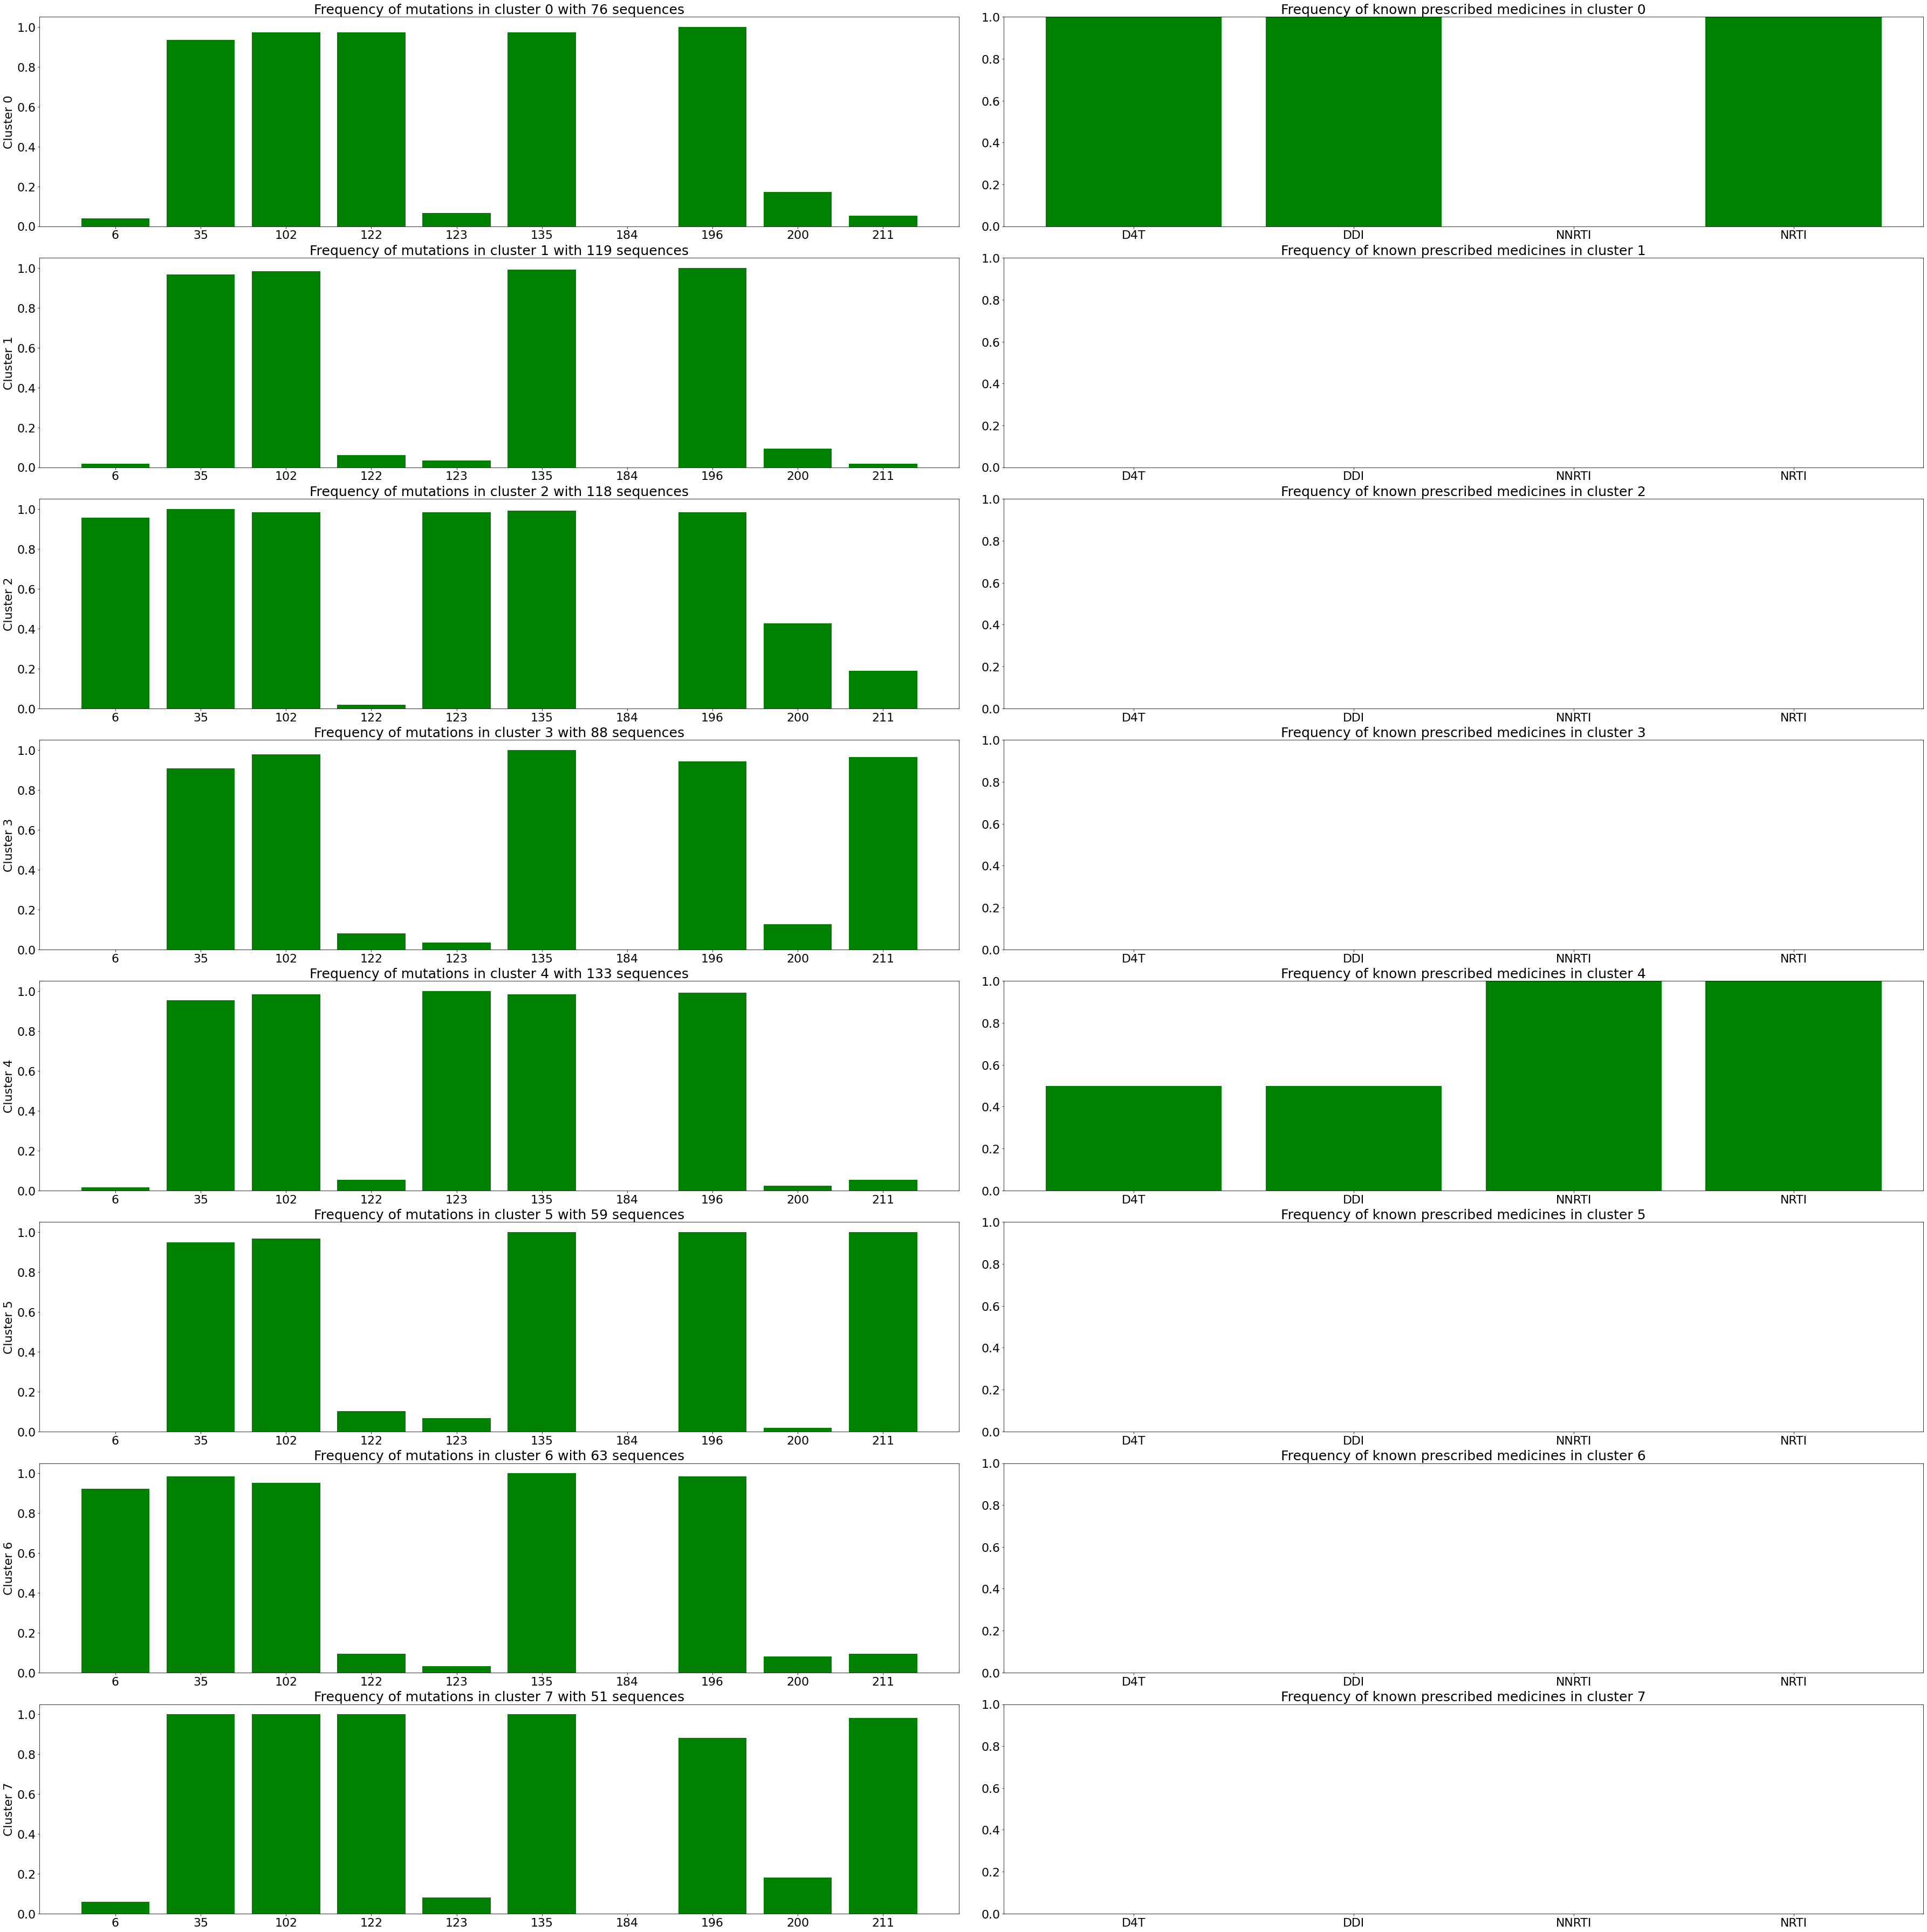

In [474]:
plot_cluster_mutation_distributions(sub_clustering, cluster1_metadata, seen_sub)

# Analyze results with phylogenetic trees

In [162]:
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [163]:
train_metadata.shape[0] / 17

861.8235294117648

In [166]:
seen.keys()

dict_keys([0, 1, -1, 2, 3, 4, 20, 5, 6, 12, 19, 18, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17])

In [486]:
CLUSTER = 3
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import random 
from Bio import SeqIO
import statistics


RANDOM = False  # If computing for a large random cluster (computation done on Google Colab)

def compute_trees(metadata, seen):
    for i in range(0, len(seen.keys())):   
        cluster11 = []
        cluster11_metadata = []
        indices = [index for (index, seq) in seen[i]]
        # indices = random.sample(range(1, train_metadata.shape[0]), 50)  # if generating random cluster
        for ind in indices:
            cluster11_metadata.append(metadata.iloc[ind])  #norm_metadata
            cluster11.append(train_data.iloc[ind])  # norm_train

        cluster11 = pd.DataFrame(cluster11)
        cluster11_metadata = pd.DataFrame(cluster11_metadata)

        # Compute homogeneity indexes
        # mut_index, med_index = compute_homogeneity_indexes(cluster1_metadata)
        # print(mut_index)
        # print(med_index)

        # Construct fasta file 
        patinfo = cluster11_metadata.drop_duplicates(subset=['PatientID'], keep='last')
        with open('phyl.fasta', 'w') as file:
            for seq in patinfo.iterrows():
                stuff = str(seq[1]['Patient info']).replace("_", "")
                file.write(f"{stuff}\n{seq[1].Sequence}\n")
        records = SeqIO.parse("phyl.fasta", "fasta")
        count = SeqIO.write(records, "phyl.phy", "phylip")
        print("Converted %i records" % count)

        # Read the sequences and align
        align = AlignIO.read('phyl.phy','phylip')

        if RANDOM:
            break

        # Calculate the distance matrix
        calculator = DistanceCalculator('identity')
        distMatrix = calculator.get_distance(align)

        # Create a DistanceTreeConstructor object
        constructor = DistanceTreeConstructor()
        # Construct the phlyogenetic tree using UPGMA algorithm
        UPGMATree = constructor.upgma(distMatrix)

        # Draw the phlyogenetic tree
        # Phylo.draw(UPGMATree)

        print(f"Max UPGMPA tree depth for cluster {i}: {max(UPGMATree.depths().values())}")
        # print(f"Average UPGMPA tree depth for cluster {i}: {statistics.mean(UPGMATree.depths().values())}")




In [487]:
compute_trees(cluster1_metadata, seen_sub)

Converted 76 records
Max UPGMPA tree depth for cluster 0: 0.030438633116268633
Converted 119 records
Max UPGMPA tree depth for cluster 1: 0.03558950350077407
Converted 118 records
Max UPGMPA tree depth for cluster 2: 0.05613080605568414
Converted 88 records
Max UPGMPA tree depth for cluster 3: 0.04171547765031342
Converted 133 records
Max UPGMPA tree depth for cluster 4: 0.3253646267235286
Converted 59 records
Max UPGMPA tree depth for cluster 5: 0.030083233105154435
Converted 63 records
Max UPGMPA tree depth for cluster 6: 0.022115382165722505
Converted 51 records
Max UPGMPA tree depth for cluster 7: 0.036367694170712235


KeyError: 8

# Analyze by training classification network 
## Sequences -> clusters

In [ ]:
%matplotlib inline
import pandas as pd

In [ ]:
np.array(train_metadata.iloc[1000].Cocktail)

In [ ]:
drugs = set()
for i in range(len(clustering.labels_)):
    c = train_metadata.iloc[i]['Cocktail']
    for drug in c:
        drugs.add(drug)
index = enumerate(drugs)
for i,j in index:
    print(i,j)


In [ ]:
seqs = []
# metas = []
clusts = [] 
df = pd.DataFrame()
cs = {} # Cocktails {Drug: [1 0 0 0..], Drug2: [1 0 0 0 1..], ...}

for i in range(len(clustering.labels_)):
    cluster = clustering.labels_[i]
    c = train_metadata.iloc[i]['Cocktail']
    for drug in drugs:
        if drug not in cs:
            cs[drug] = []
        hasd = 1 if drug in c else 0
        cs[drug].append(hasd)
    clusts.append(cluster)
        

In [ ]:
df = train_data.copy()
for drug in drugs:
    df[f'{drug}'] = cs[drug]
df['Cluster'] = clusts
# df['Metadata'] = metas
df = df[df.Cluster != -1]
df.head()

In [ ]:
df.to_csv('data.csv')

In [ ]:
drugs

In [ ]:
seen.keys()